# Esercitazione 11 - Reti neurali (NN)

In questa esercitazione si vuole realizzare un approccio preliminare alle reti neurali, esplorando le librerie più diffuse per l'implementazione di tali modelli. 

Una rete neurale in prima istanza può essere utilizzata per fittare dati distribuiti anche in maniera non banale. La procedura standard è separare i dati a disposizione in due insiemi: uno di training e uno di validazione. Con il primo si allena il modello (supervised learning), ovvero l'algoritmo di apprendimento cerca di settare i parametri allenabili (il cui numero va scelto in maniera opportuna) affinchè l'errore (in genere valutato come *mean square error (MSE)*) tra i dati riprodotti dal modello e i dati veri, venga minimizzato. Con il secondo insieme di validazione si valuta di nuovo l'errore tra dati riprodotti dal modello e dati reali. In questo modo si può stabilire se il modello allenato è buono nel generalizzare (ovvero fare predizioni accurate con dati mai visti nella fase di allenamento). Potenzialmente aumentando la complessità del modello è possibile ottenere risultati sempre migliori sul training set, ma ad un certo punto la capacità predittiva sui dati di valutazione peggiora. Quando ciò accade si parla di overfitting, il modello si è aadeguato troppo ai dati di training e non è più in grado di generalizzare bene.

In generale un modello di rete neurale dipende dalle seguenti caratteristiche:
- Dataset (di training e di validazione)
- Funzione costo (quantifica l'errore tra dati predetti e dati reali)
- Ottimizzatore (algoritmo con cui il modello esplora lo spazio dei parametri per raggiungere il minimo della funzione costo).
- Struttura scelta per il modello (numero di layers, neuroni per layer, tipo di layer: recursive, convolutional...)

In questo esercizio si vuole partire da un esempio semplice di funzione da cui vengono estratti dei dati con un certo livello di rumore, a partire dai quali si vuole allenare una rete che riproduca bene la funzione di partenza.

La prima funzione in esame è:
$$
f(x)=2x+1
$$

Si vuole osservare come una semplice rete neurale si comporta al variare di:
- Numero di epoche (numero di volte in cui l'intero dataset passa attraverso la rete)
- La grandezza dell'insieme di training
- Il rumore dei dati presi in esame dalla rete


Per osservare quanto descritto sopra riguardo all'overfitting, si eseguono 4 test con diverso numero di dati di training $N_{train}$ per ogni valore scelto per il rumore, quantificato da $\sigma = 0.0, 0.2, 0.4$.

### - $N_{train}=500$ , $\sigma = 0.0$

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

import numpy as np
import matplotlib.pyplot as plt

N_train = 500

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

In [1]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

2025-05-26 15:52:01.146506: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748267521.165737   10378 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748267521.171061   10378 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-26 15:52:01.186940: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 1.0398 - mse: 1.0398 - val_loss: 0.6483 - val_mse: 0.6483
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6126 - mse: 0.6126 - val_loss: 0.3837 - val_mse: 0.3837
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3779 - mse: 0.3779 - val_loss: 0.2387 - val_mse: 0.2387
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2392 - mse: 0.2392 - val_loss: 0.1559 - val_mse: 0.1559
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1674 - mse: 0.1674 - val_loss: 0.1067 - val_mse: 0.1067
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1155 - mse: 0.1155 - val_loss: 0.0761 - val_mse: 0.0761
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0826 - mse: 0.0826 - val_loss: 0.0563 - val_mse: 0.0563
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0563 - mse: 0.0563 - val_loss: 0.0428 - val_mse: 0.0428
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - lo

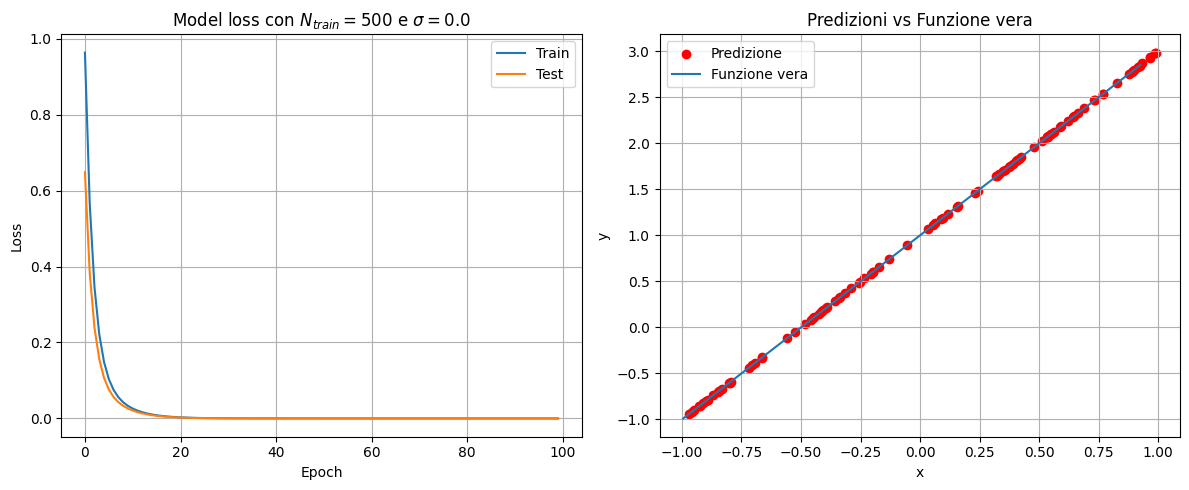

In [10]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

history = model.fit(x=x_train, y=y_train, 
                    batch_size=32, epochs=100, 
                    shuffle=True,
                    validation_data=(x_valid, y_valid))

#valuto la performance sulla funzione esatta
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

print("Train loss: ", score[0], '\n')

#Plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 riga, 2 colonne

# Plotto Train/Validation Loss
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title(rf'Model loss con $N_{{train}} = {N_train}$ e $\sigma = {sigma}$')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend(['Train', 'Test'], loc='best')
axes[0].grid(True)

# Plotto predizioni VS curva vera
x_predicted = np.random.uniform(-1, 1, 100)
x_predicted = np.sort(x_predicted)  # ordinamento opzionale per linee più pulite
y_predicted = model.predict(x_predicted)

axes[1].scatter(x_predicted, y_predicted, color='r', label='Predizione')
axes[1].plot(x_valid, y_target, label='Funzione vera')
axes[1].set_title('Predizioni vs Funzione vera')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

Si può notare come bastino soltanto 20 epoche per minimizzare la funzione costo, nel caso di dati senza rumore.

### - $N_{train}=500$ , $\sigma = 0.2$

In [12]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

import numpy as np
import matplotlib.pyplot as plt

N_train = 500

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 2.8337 - mse: 2.8337 - val_loss: 2.1099 - val_mse: 2.1099
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.1672 - mse: 2.1672 - val_loss: 1.5795 - val_mse: 1.5795
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.6209 - mse: 1.6209 - val_loss: 1.2129 - val_mse: 1.2129
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2268 - mse: 1.2268 - val_loss: 0.9500 - val_mse: 0.9500
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9577 - mse: 0.9577 - val_loss: 0.7529 - val_mse: 0.7529
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7494 - mse: 0.7494 - val_loss: 0.6011 - val_mse: 0.6011
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5863 - mse: 0.5863 - val_loss: 0.4852 - val_mse: 0.4852
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4963 - mse: 0.4963 - val_loss: 0.3949 - val_mse: 0.3949
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - lo

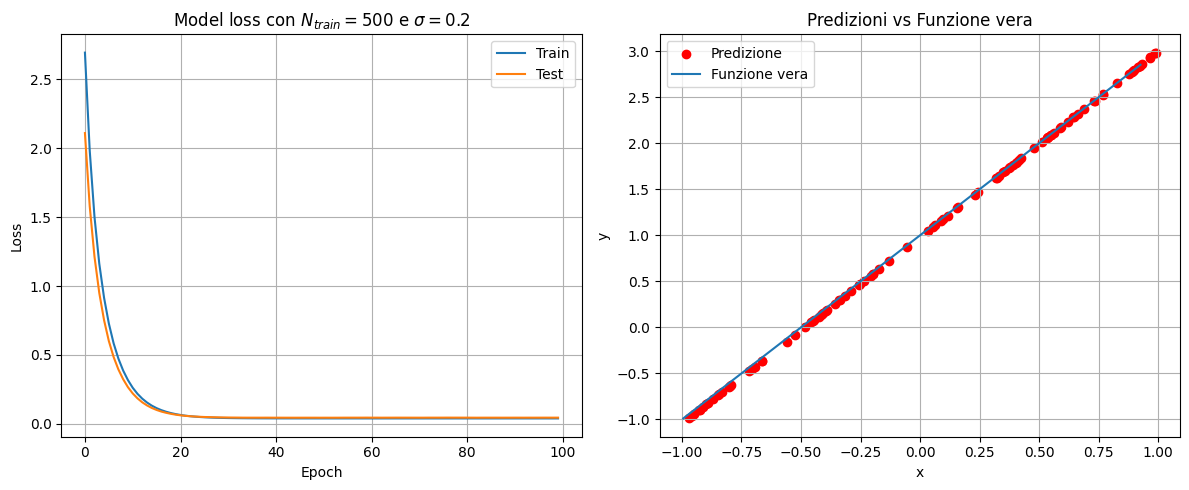

In [13]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

history = model.fit(x=x_train, y=y_train, 
                    batch_size=32, epochs=100, 
                    shuffle=True,
                    validation_data=(x_valid, y_valid))

#valuto la performance sulla funzione esatta
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

print("Loss sulla funzione esatta: ", score[0], '\n')

#Plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 riga, 2 colonne

# Plotto Train/Validation Loss
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title(rf'Model loss con $N_{{train}} = {N_train}$ e $\sigma = {sigma}$')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend(['Train', 'Test'], loc='best')
axes[0].grid(True)

# Plotto predizioni VS curva vera
x_predicted = np.random.uniform(-1, 1, 100)
x_predicted = np.sort(x_predicted)  # ordinamento opzionale per linee più pulite
y_predicted = model.predict(x_predicted)

axes[1].scatter(x_predicted, y_predicted, color='r', label='Predizione')
axes[1].plot(x_valid, y_target, label='Funzione vera')
axes[1].set_title('Predizioni vs Funzione vera')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In questo caso sono necessarie circa 10 epoche in più per arrivare al minimo della loss function. In generale la loss trovata è peggiore rispetto al caso sopra senza rumore, come ci si aspetterebbe.

### - $N_{train}=500$ , $\sigma = 0.4$

In [14]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

import numpy as np
import matplotlib.pyplot as plt

N_train = 500

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.4 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 4.8500 - mse: 4.8500 - val_loss: 3.7813 - val_mse: 3.7813
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.9736 - mse: 3.9736 - val_loss: 2.9623 - val_mse: 2.9623
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.0823 - mse: 3.0823 - val_loss: 2.3468 - val_mse: 2.3468
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.4294 - mse: 2.4294 - val_loss: 1.8811 - val_mse: 1.8811
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.8222 - mse: 1.8222 - val_loss: 1.5210 - val_mse: 1.5210
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.5523 - mse: 1.5523 - val_loss: 1.2432 - val_mse: 1.2432
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.2205 - mse: 1.2205 - val_loss: 1.0223 - val_mse: 1.0223
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.0175 - mse: 1.0175 - val_loss: 0.8504 - val_mse: 0.8504
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - lo

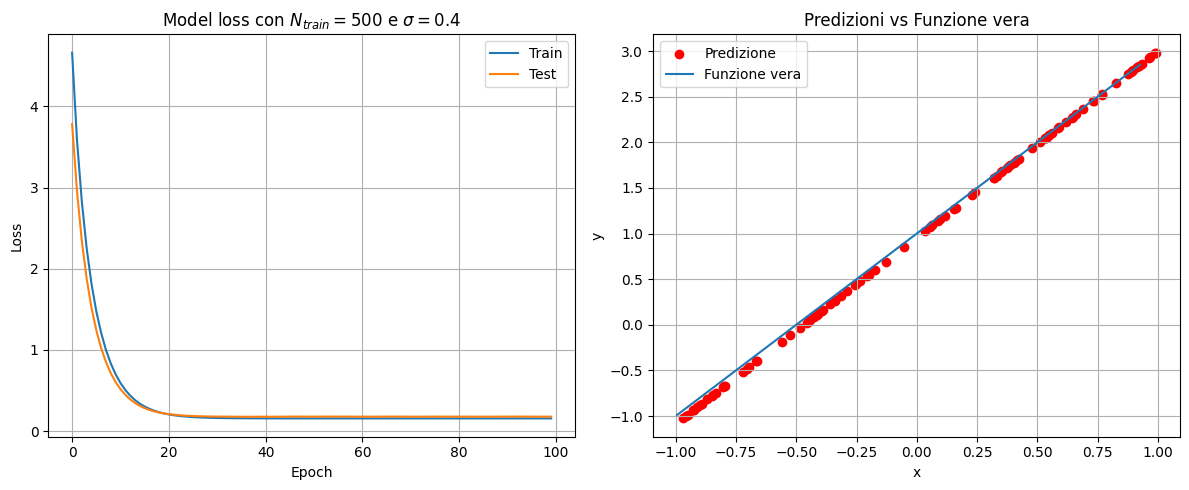

In [15]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

history = model.fit(x=x_train, y=y_train, 
                    batch_size=32, epochs=100, 
                    shuffle=True,
                    validation_data=(x_valid, y_valid))

#valuto la performance sulla funzione esatta
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

print("Loss sulla funzione esatta: ", score[0], '\n')

#Plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 riga, 2 colonne

# Plotto Train/Validation Loss
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title(rf'Model loss con $N_{{train}} = {N_train}$ e $\sigma = {sigma}$')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend(['Train', 'Test'], loc='best')
axes[0].grid(True)

# Plotto predizioni VS curva vera
x_predicted = np.random.uniform(-1, 1, 100)
x_predicted = np.sort(x_predicted)  # ordinamento opzionale per linee più pulite
y_predicted = model.predict(x_predicted)

axes[1].scatter(x_predicted, y_predicted, color='r', label='Predizione')
axes[1].plot(x_valid, y_target, label='Funzione vera')
axes[1].set_title('Predizioni vs Funzione vera')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

Per presentare un effetto di overfitting si prendono ora dati molto disordinati ($\sigma = 1.5$) con un numero alto di training data, lasciando invariato il numero di validation data.

### -$N_{train} = 1000$ , $\sigma = 1.5$

In [16]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

import numpy as np
import matplotlib.pyplot as plt

N_train = 1000

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 1.5 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.1263 - mse: 3.1263 - val_loss: 1.9898 - val_mse: 1.9898
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.4071 - mse: 2.4071 - val_loss: 1.8982 - val_mse: 1.8982
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.2620 - mse: 2.2620 - val_loss: 1.8975 - val_mse: 1.8975
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.0099 - mse: 2.0099 - val_loss: 1.9093 - val_mse: 1.9093
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.2819 - mse: 2.2819 - val_loss: 1.9112 - val_mse: 1.9112
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.1463 - mse: 2.1463 - val_loss: 1.9143 - val_mse: 1.9143
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.2034 - mse: 2.2034 - val_loss: 1.9200 - val_mse: 1.9200
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.0671 - mse: 2.0671 - val_loss: 1.9146 - val_mse: 1.9146
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - los

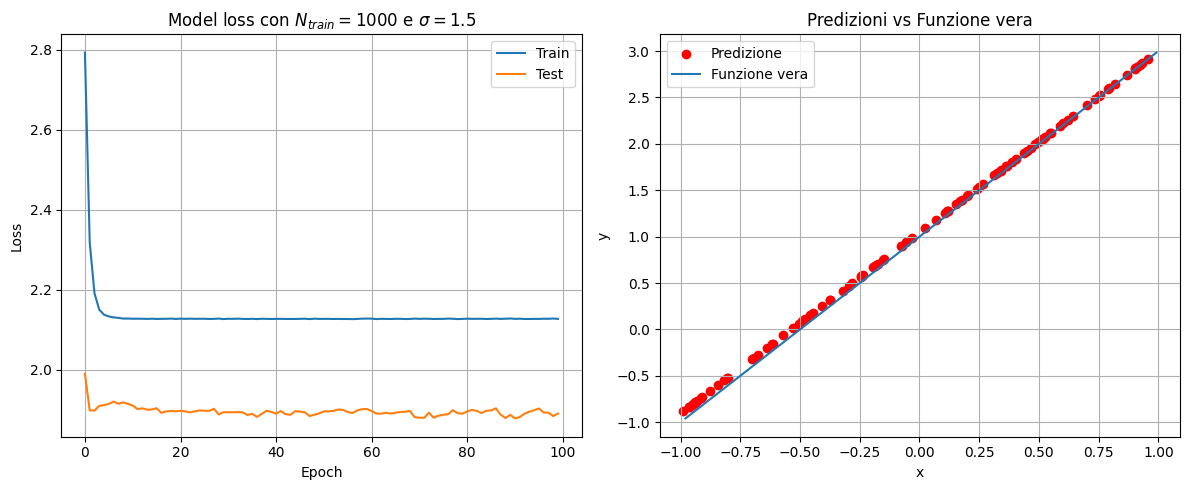

In [17]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

history = model.fit(x=x_train, y=y_train, 
                    batch_size=32, epochs=100, 
                    shuffle=True,
                    validation_data=(x_valid, y_valid))

#valuto la performance sulla funzione esatta
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

print("Loss sulla funzione esatta: ", score[0], '\n')

#Plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 riga, 2 colonne

# Plotto Train/Validation Loss
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title(rf'Model loss con $N_{{train}} = {N_train}$ e $\sigma = {sigma}$')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend(['Train', 'Test'], loc='best')
axes[0].grid(True)

# Plotto predizioni VS curva vera
x_predicted = np.random.uniform(-1, 1, 100)
x_predicted = np.sort(x_predicted)  # ordinamento opzionale per linee più pulite
y_predicted = model.predict(x_predicted)

axes[1].scatter(x_predicted, y_predicted, color='r', label='Predizione')
axes[1].plot(x_valid, y_target, label='Funzione vera')
axes[1].set_title('Predizioni vs Funzione vera')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

Si può notare che la curva che segue la loss function sui dati di test non è più regolare come nei casi precedenti. L'effetto di overfitting non risulta particolarmente evidente con soli due parametri da allenare, aumentando però la complessità della rete ci si aspetta che questo effetto diventi più evidente:

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 4.0207 - mse: 4.0207 - val_loss: 3.2324 - val_mse: 3.2324
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.8405 - mse: 2.8405 - val_loss: 2.5325 - val_mse: 2.5325
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.3625 - mse: 2.3625 - val_loss: 2.2373 - val_mse: 2.2373
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.2102 - mse: 2.2102 - val_loss: 2.0761 - val_mse: 2.0761
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.0886 - mse: 2.0886 - val_loss: 2.0105 - val_mse: 2.0105
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.1223 - mse: 2.1223 - val_loss: 1.9774 - val_mse: 1.9774
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.0215 - mse: 2.0215 - val_loss: 1.9315 - val_mse: 1.9315
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.1501 - mse: 2.1501 - val_loss: 1.9208 - val_mse: 1.9208
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - lo

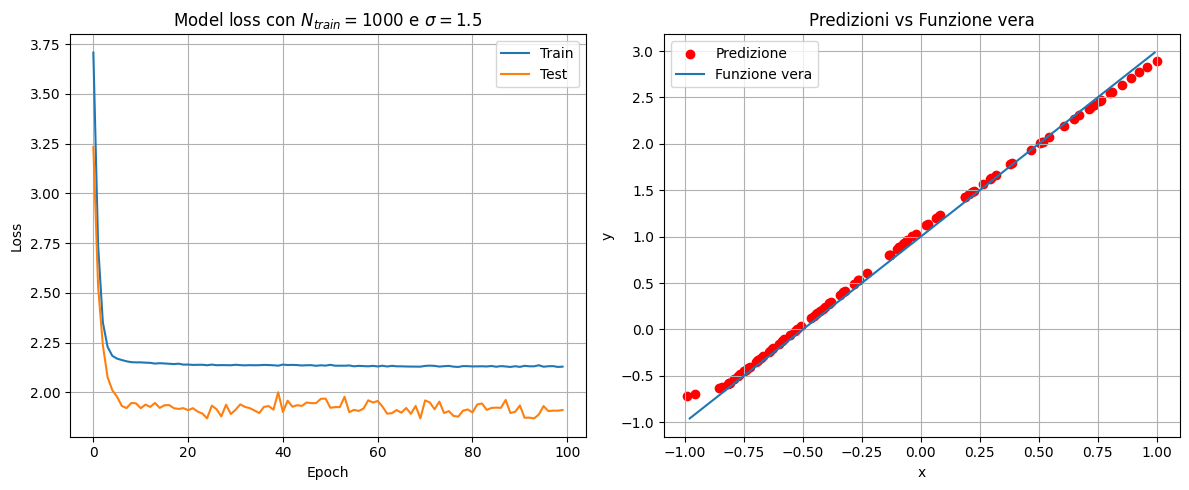

In [21]:
model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(1,), activation='relu'))
model.add(Dense(1))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

history = model.fit(x=x_train, y=y_train, 
                    batch_size=32, epochs=100, 
                    shuffle=True,
                    validation_data=(x_valid, y_valid))

#valuto la performance sulla funzione esatta
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

print("Loss sulla funzione esatta: ", score[0], '\n')

#Plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 riga, 2 colonne

# Plotto Train/Validation Loss
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title(rf'Model loss con $N_{{train}} = {N_train}$ e $\sigma = {sigma}$')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend(['Train', 'Test'], loc='best')
axes[0].grid(True)

# Plotto predizioni VS curva vera
x_predicted = np.random.uniform(-1, 1, 100)
x_predicted = np.sort(x_predicted)  # ordinamento opzionale per linee più pulite
y_predicted = model.predict(x_predicted)

axes[1].scatter(x_predicted, y_predicted, color='r', label='Predizione')
axes[1].plot(x_valid, y_target, label='Funzione vera')
axes[1].set_title('Predizioni vs Funzione vera')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

Aumentare la complessità della rete inserendo funzioni di attivazione non lineari non è come intuibile una buona idea per fittare dati estratti da una retta, questo a riprova del fatto che una complessità elevata non è sinonimo di alto potenziale predittivo di una rete. La complessità, dunque la scelta della topologia di una rete dipende fortemente dal problema da risolvere.

## Esercizio 11.2

Si vuole ora considerare una funzione più complicata, non lineare, per osservare un caso in cui invece è necessario inserire delle non linearità nel modello. La funzione da cui si estraggono i dati è ora:
$$
f(x)=4-3x-2x^2+3x^3
$$
per $x \in [-1,1]$.

con un rumore dato da $\sigma = 0.3$.

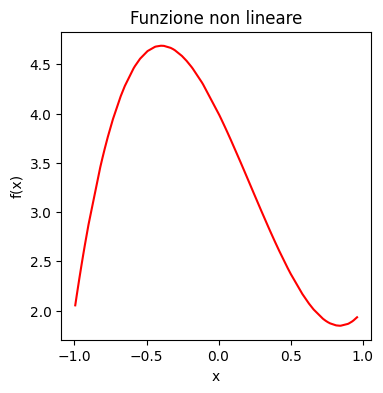

In [2]:
#Compilare la cella dove viene importato tensorflow 
import numpy as np
import matplotlib.pyplot as plt

N_train = 500

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, 80)
x_valid.sort()
y_target = 4 - 3*x_valid - 2*x_valid**2 + 3*x_valid**3 # ideal (target) non-linear function

sigma = 0.3 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(4 - 3*x_train - 2*x_train**2 + 3*x_train**3 , sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(4 - 3*x_valid - 2*x_valid**2 + 3*x_valid**3, sigma)

plt.figure(figsize=(4,4))
plt.title("Funzione non lineare")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x_valid, y_target, color='red')
plt.show()

In [21]:
def model_creator(layers, n_per_layer, act_func, optim, N_epochs):

    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))
    for i in range(layers):
        model.add(Dense(n_per_layer, activation=act_func))
    model.add(Dense(1))

    model.compile(optimizer=optim, loss='mse', metrics=['mse'])
    #model.summary()

    history = model.fit(x=x_train, y=y_train,
                        batch_size=32, epochs=N_epochs,
                        shuffle=True,
                        validation_data=(x_valid, y_valid),
                       verbose=0)


    #valuto la performance sulla funzione esatta nell'intervallo do train
    score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)

    print('\n', '\n', "Modello con ", layers, " hidden layers con ", n_per_layer, " neuroni ciascuno, activation function: ",
          act_func," , optimizer: ", optim, '\n', '\n')
    print("Loss sulla funzione esatta: ", score[0], '\n')

    #Plots
    fig, axes = plt.subplots(1, 3, figsize=(12, 5))  # 1 riga, 2 colonne

    # Plotto Train/Validation Loss
    axes[0].plot(history.history['loss'])
    axes[0].plot(history.history['val_loss'])
    axes[0].set_title(rf'Model loss con $N_{{train}} = {N_train}$ e $\sigma = {sigma}$')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend(['Train', 'Test'], loc='best')
    axes[0].grid(True)

    # Plotto predizioni VS curva vera
    x_predicted = np.random.uniform(-1, 1, 100)
    x_predicted = np.sort(x_predicted)  # ordinamento opzionale per linee più pulite
    y_predicted = model.predict(x_predicted)

    axes[1].scatter(x_predicted, y_predicted, color='r', label='Predizione')
    axes[1].plot(x_valid, y_target, label='Funzione vera')
    axes[1].set_title('Predizioni vs Funzione vera')
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('y')
    axes[1].legend()
    axes[1].grid(True)

    #Valuto capacità predittiva fuori da intervallo di train
    x_outrange = np.random.uniform(-2, 2, 500)
    x_outrange = np.sort(x_outrange)
    y_outrange = 4 - 3*x_outrange - 2*x_outrange**2 + 3*x_outrange**3 # ideal (target) non-linear function

    score = model.evaluate(x_outrange, y_outrange, batch_size=32, verbose=0)

    print('\n', "Loss sulla funzione esatta, fuori intervallo di train: ", score[0], '\n')

    # Plotto predizioni VS curva vera, fuori range
    x_predicted_out = np.random.uniform(-2, 2, 300)
    x_predicted_out = np.sort(x_predicted_out)  # ordinamento opzionale per linee più pulite
    y_predicted_out = model.predict(x_predicted_out)
    y_target_out = 4 - 3*x_outrange - 2*x_outrange**2 + 3*x_outrange**3 # ideal (target) non-linear function
    
    axes[2].scatter(x_predicted_out, y_predicted_out, color='r', label='Predizione')
    axes[2].plot(x_outrange, y_target_out, label='Funzione vera')
    axes[2].set_title('Predizioni vs Funzione vera')
    axes[2].set_xlabel('x')
    axes[2].set_ylabel('y')
    axes[2].legend()
    axes[2].grid(True)

    plt.tight_layout()
    plt.show()



 
 Modello con  1  hidden layers con  10  neuroni ciascuno, activation function:  relu  , optimizer:  sgd 
 

Loss sulla funzione esatta:  0.03473430499434471 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

 Loss sulla funzione esatta, fuori intervallo di train:  28.19051170349121 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


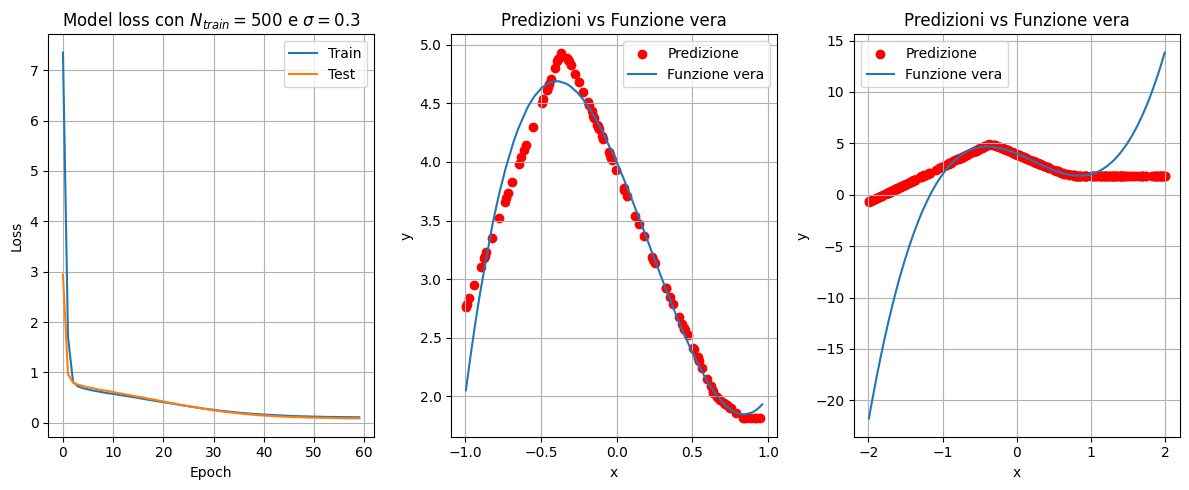


 
 Modello con  2  hidden layers con  15  neuroni ciascuno, activation function:  relu  , optimizer:  sgd 
 

Loss sulla funzione esatta:  0.019722241908311844 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

 Loss sulla funzione esatta, fuori intervallo di train:  43.89572525024414 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


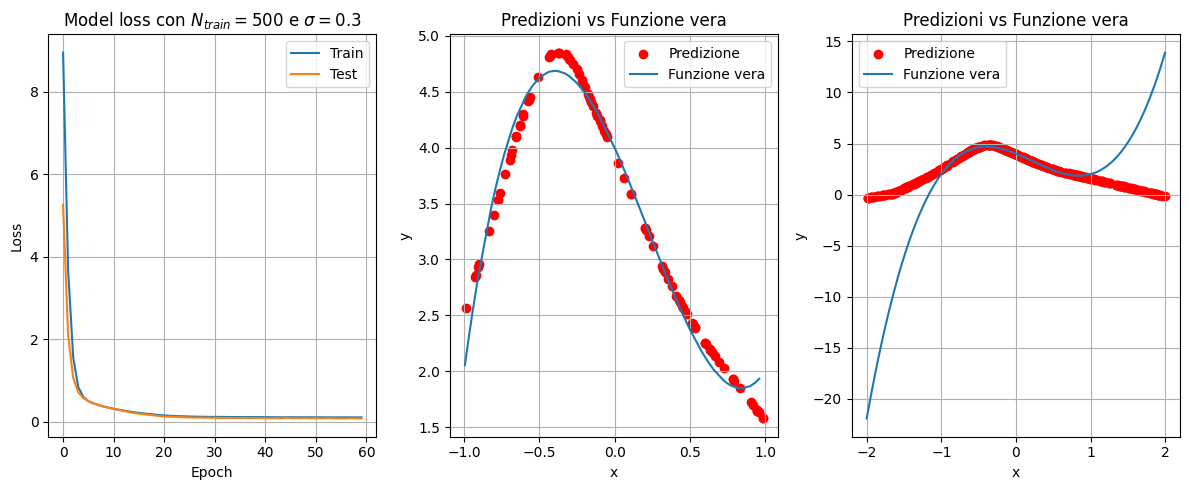


 
 Modello con  3  hidden layers con  20  neuroni ciascuno, activation function:  relu  , optimizer:  sgd 
 

Loss sulla funzione esatta:  0.011508878320455551 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

 Loss sulla funzione esatta, fuori intervallo di train:  26.733278274536133 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


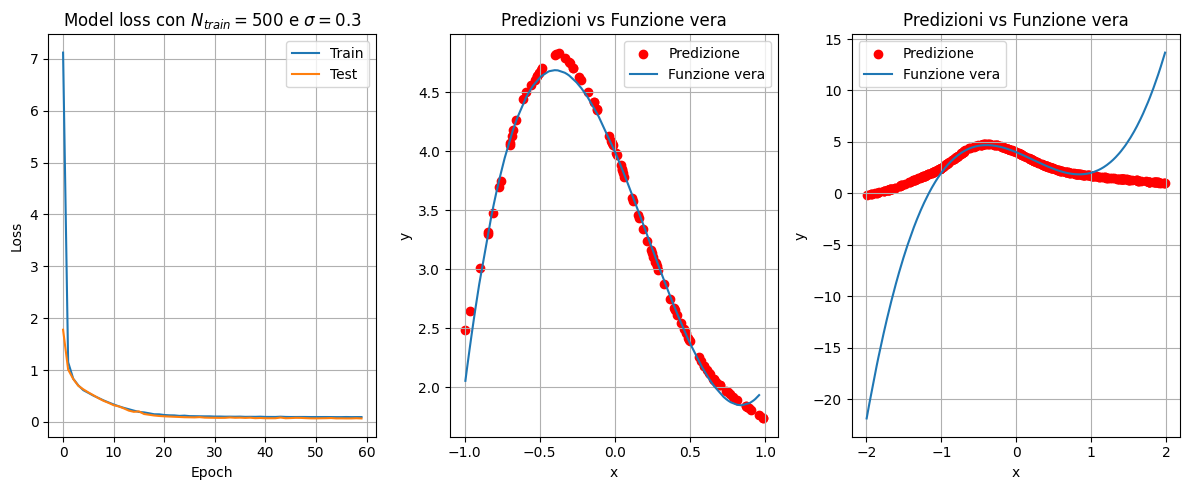


 
 Modello con  4  hidden layers con  25  neuroni ciascuno, activation function:  relu  , optimizer:  sgd 
 

Loss sulla funzione esatta:  0.0132527407258749 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

 Loss sulla funzione esatta, fuori intervallo di train:  47.680118560791016 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


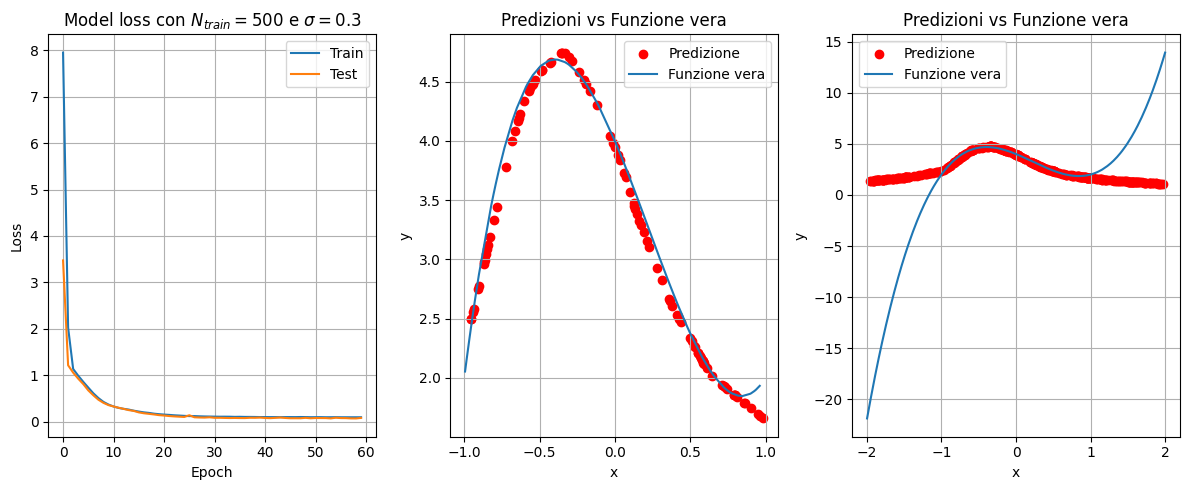


 
 Modello con  1  hidden layers con  10  neuroni ciascuno, activation function:  relu  , optimizer:  adam 
 

Loss sulla funzione esatta:  0.6695546507835388 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

 Loss sulla funzione esatta, fuori intervallo di train:  48.58094024658203 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


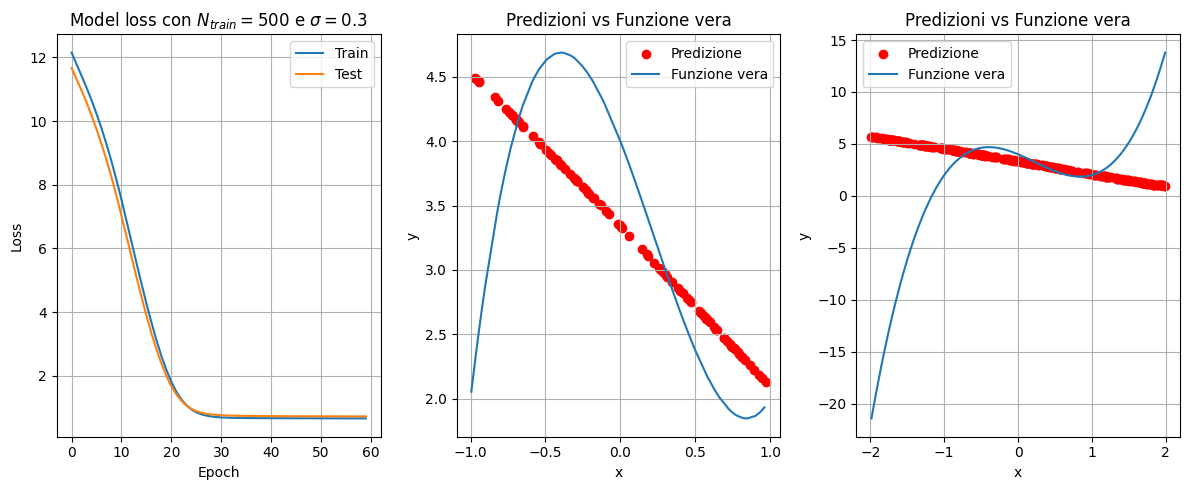


 
 Modello con  2  hidden layers con  15  neuroni ciascuno, activation function:  relu  , optimizer:  adam 
 

Loss sulla funzione esatta:  0.11132808774709702 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

 Loss sulla funzione esatta, fuori intervallo di train:  43.61119842529297 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


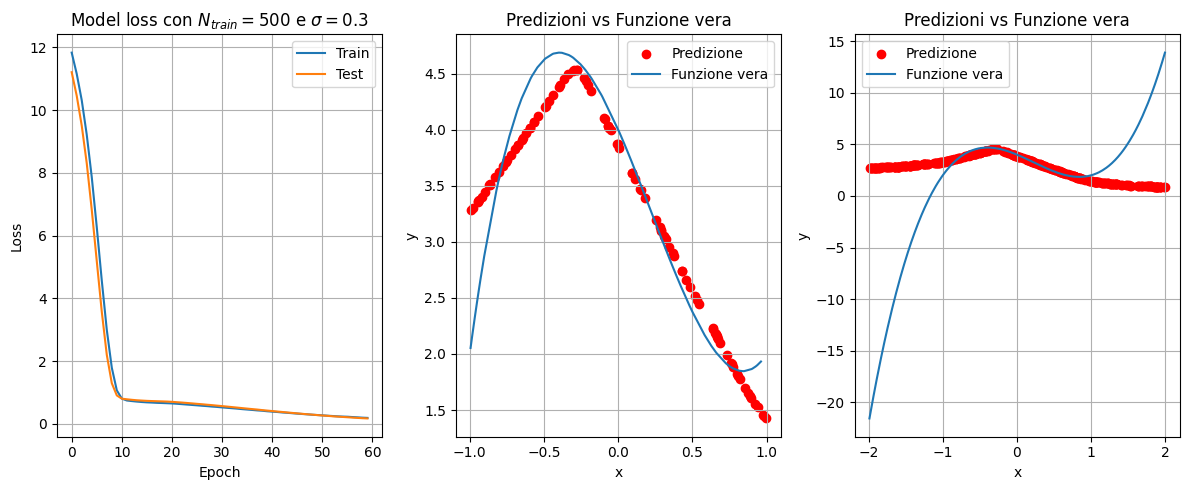


 
 Modello con  3  hidden layers con  20  neuroni ciascuno, activation function:  relu  , optimizer:  adam 
 

Loss sulla funzione esatta:  0.00656737620010972 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

 Loss sulla funzione esatta, fuori intervallo di train:  39.263031005859375 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


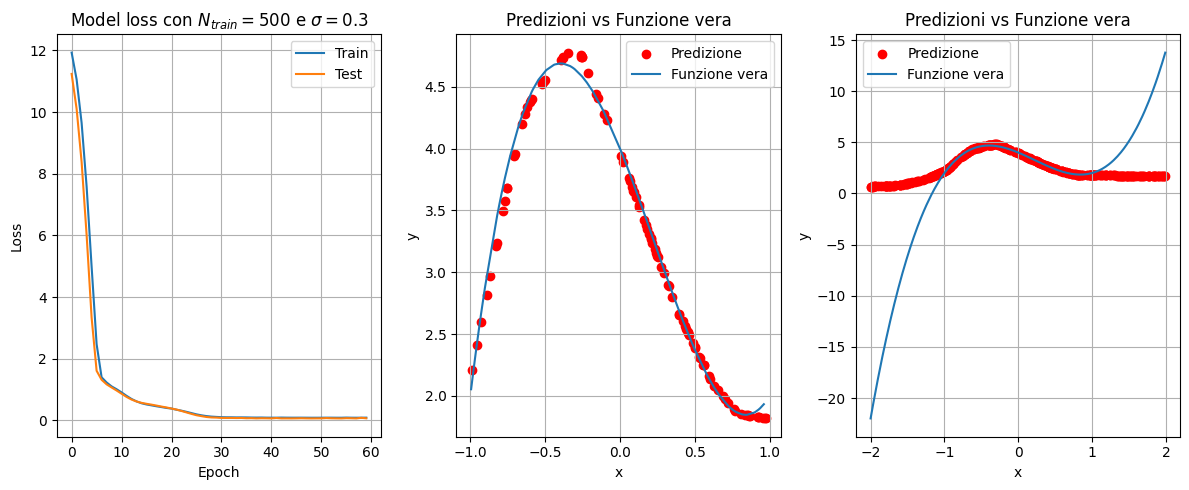


 
 Modello con  4  hidden layers con  25  neuroni ciascuno, activation function:  relu  , optimizer:  adam 
 

Loss sulla funzione esatta:  0.01004597544670105 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

 Loss sulla funzione esatta, fuori intervallo di train:  37.13046646118164 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


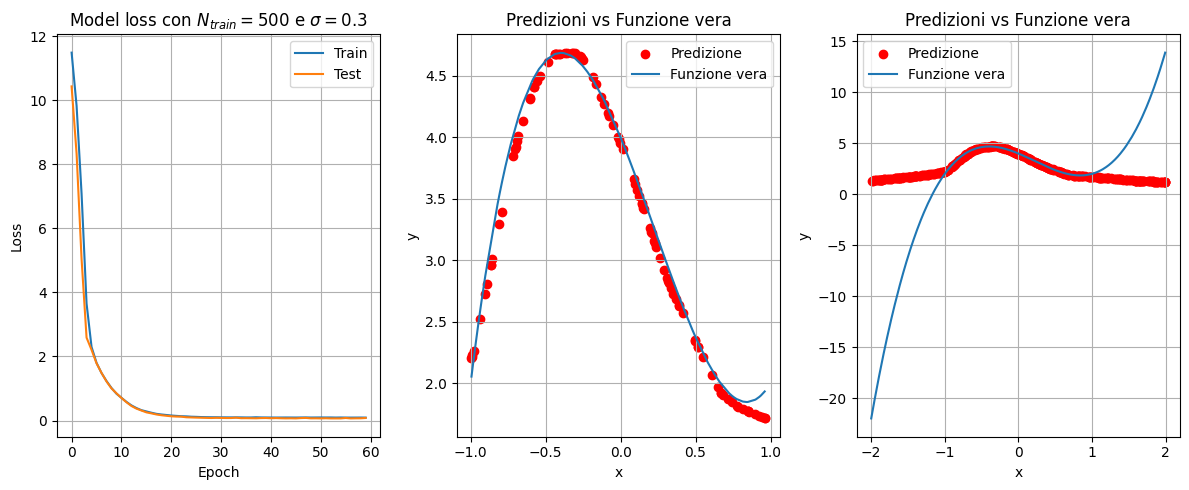


 
 Modello con  1  hidden layers con  10  neuroni ciascuno, activation function:  elu  , optimizer:  sgd 
 

Loss sulla funzione esatta:  0.17665497958660126 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

 Loss sulla funzione esatta, fuori intervallo di train:  55.17149353027344 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


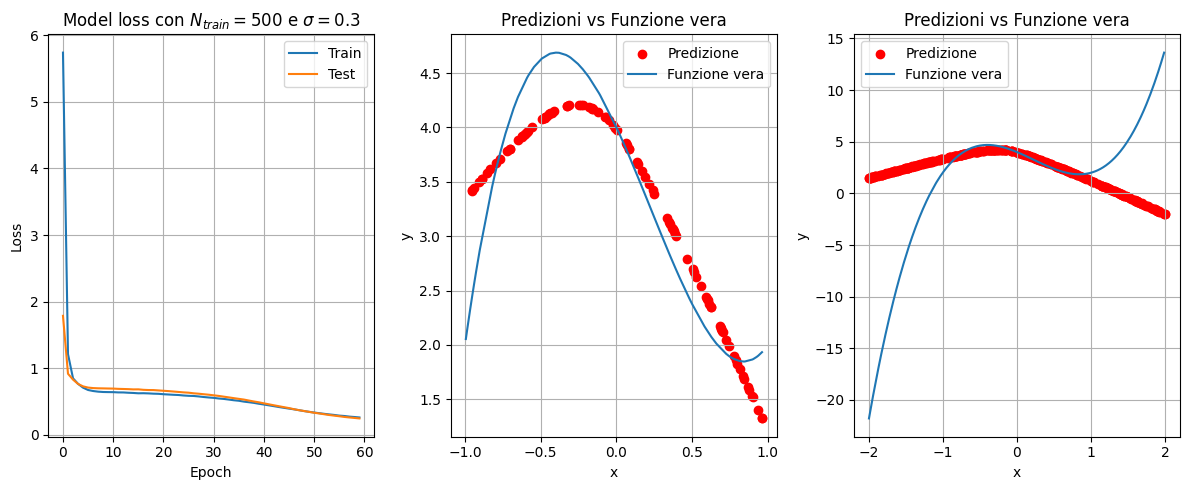


 
 Modello con  2  hidden layers con  15  neuroni ciascuno, activation function:  elu  , optimizer:  sgd 
 

Loss sulla funzione esatta:  0.013842540793120861 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

 Loss sulla funzione esatta, fuori intervallo di train:  33.946407318115234 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


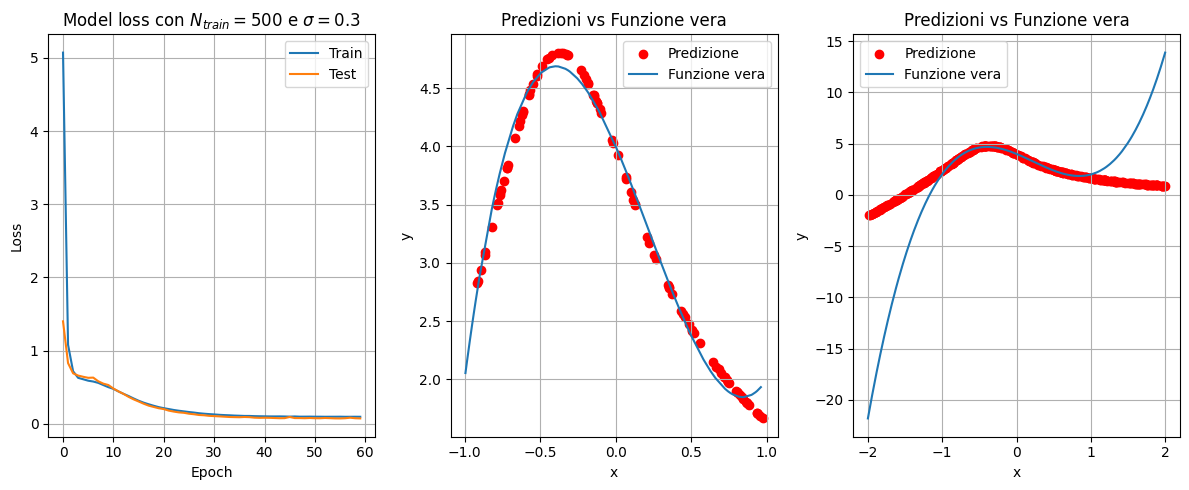


 
 Modello con  3  hidden layers con  20  neuroni ciascuno, activation function:  elu  , optimizer:  sgd 
 

Loss sulla funzione esatta:  0.018625471740961075 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

 Loss sulla funzione esatta, fuori intervallo di train:  28.36222267150879 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


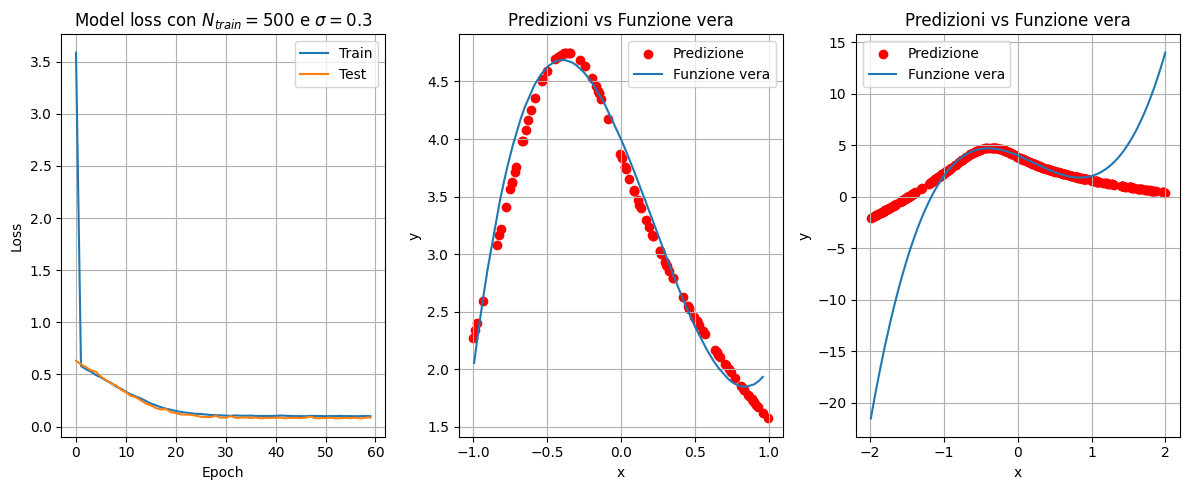


 
 Modello con  4  hidden layers con  25  neuroni ciascuno, activation function:  elu  , optimizer:  sgd 
 

Loss sulla funzione esatta:  0.02006182260811329 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

 Loss sulla funzione esatta, fuori intervallo di train:  35.90597915649414 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


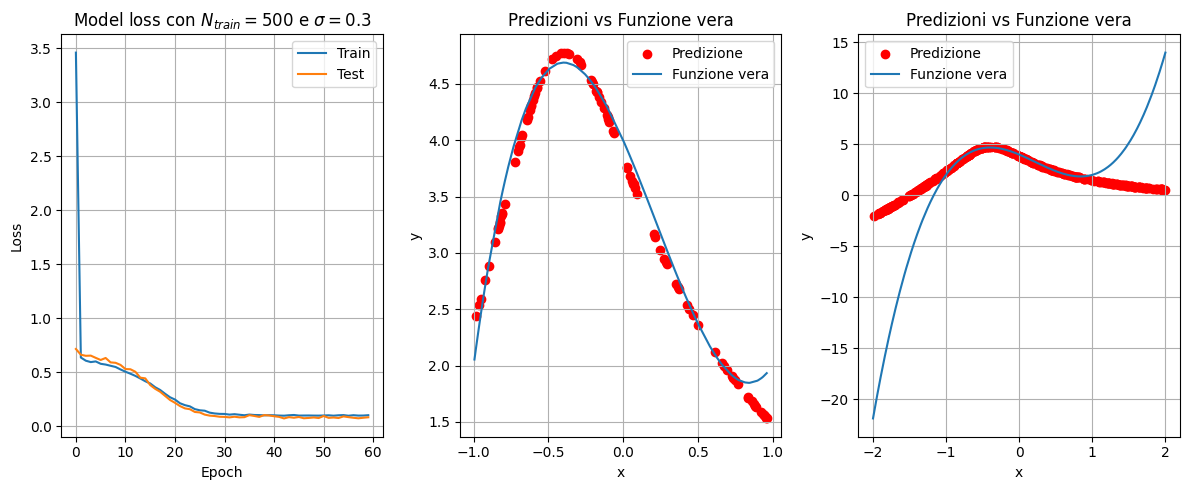


 
 Modello con  1  hidden layers con  10  neuroni ciascuno, activation function:  elu  , optimizer:  adam 
 

Loss sulla funzione esatta:  0.6400208473205566 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

 Loss sulla funzione esatta, fuori intervallo di train:  60.85609436035156 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


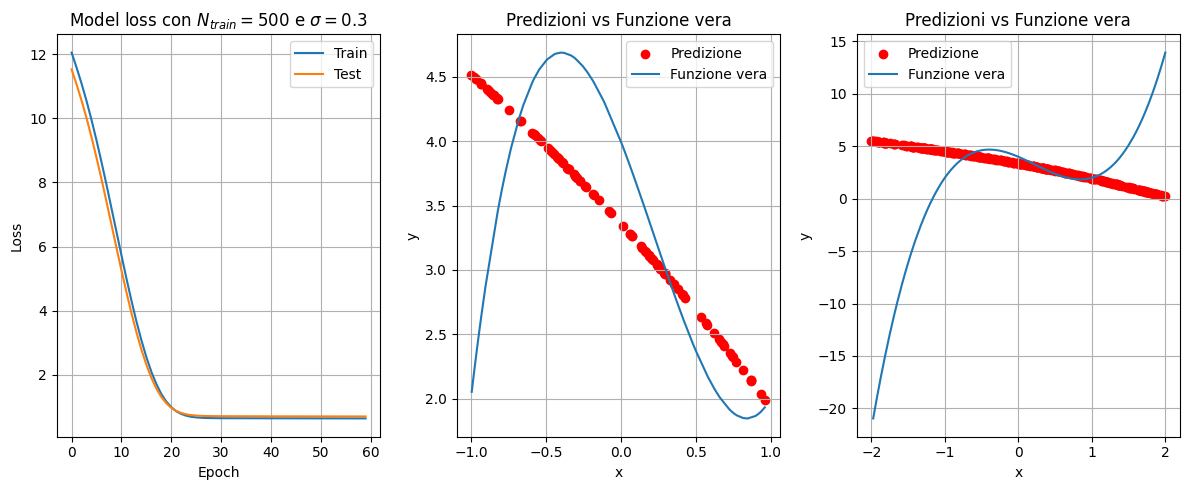


 
 Modello con  2  hidden layers con  15  neuroni ciascuno, activation function:  elu  , optimizer:  adam 
 

Loss sulla funzione esatta:  0.5798239707946777 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

 Loss sulla funzione esatta, fuori intervallo di train:  61.14385223388672 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


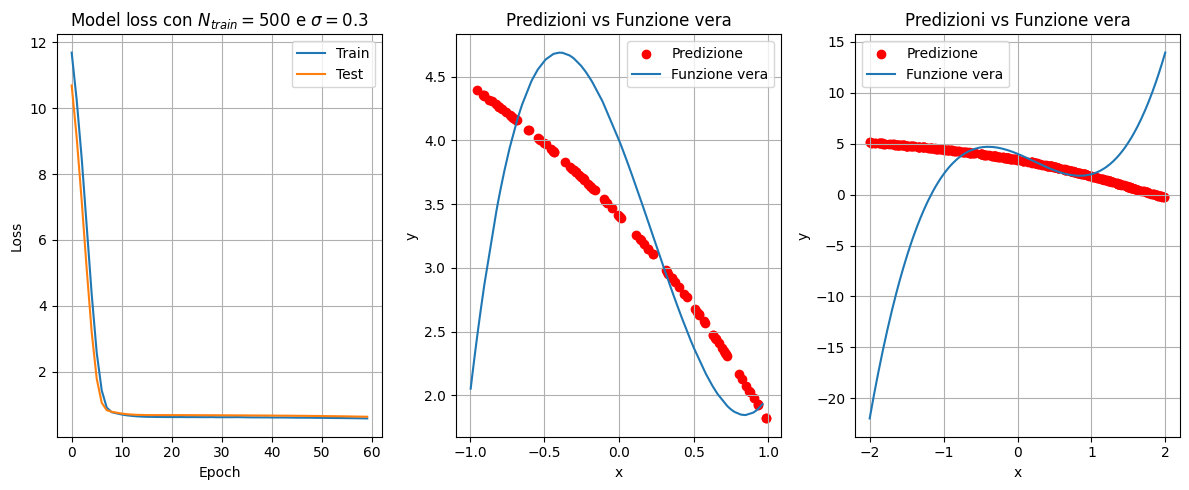


 
 Modello con  3  hidden layers con  20  neuroni ciascuno, activation function:  elu  , optimizer:  adam 
 

Loss sulla funzione esatta:  0.030832793563604355 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

 Loss sulla funzione esatta, fuori intervallo di train:  34.5805549621582 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


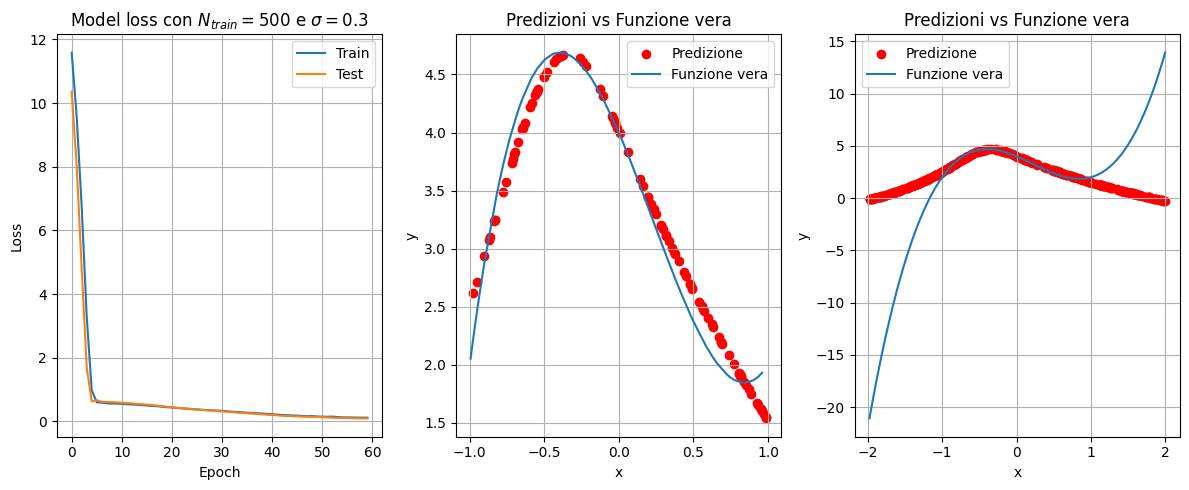


 
 Modello con  4  hidden layers con  25  neuroni ciascuno, activation function:  elu  , optimizer:  adam 
 

Loss sulla funzione esatta:  0.029266178607940674 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

 Loss sulla funzione esatta, fuori intervallo di train:  40.38124465942383 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


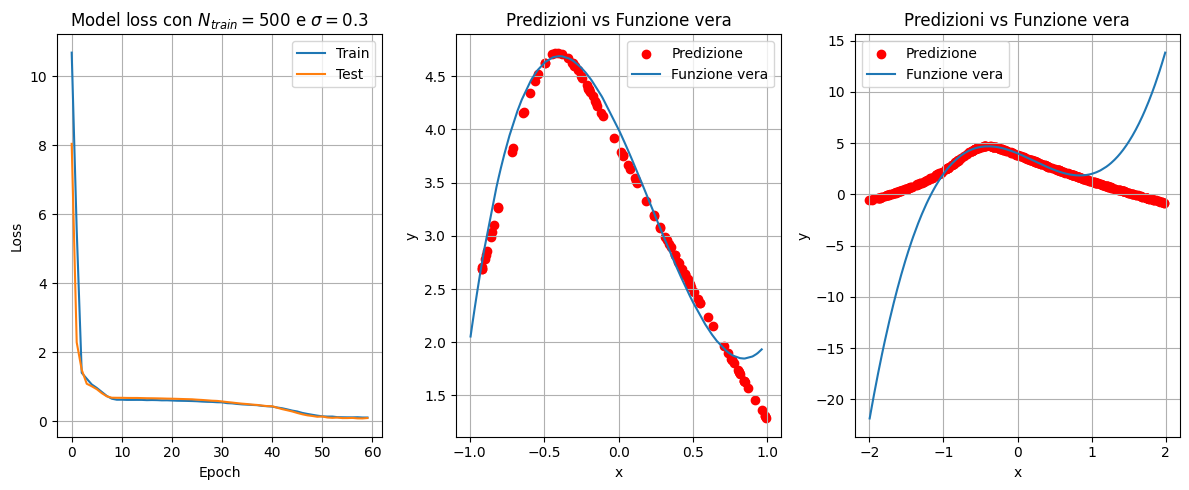


 
 Modello con  1  hidden layers con  10  neuroni ciascuno, activation function:  selu  , optimizer:  sgd 
 

Loss sulla funzione esatta:  0.042123209685087204 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

 Loss sulla funzione esatta, fuori intervallo di train:  40.929962158203125 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


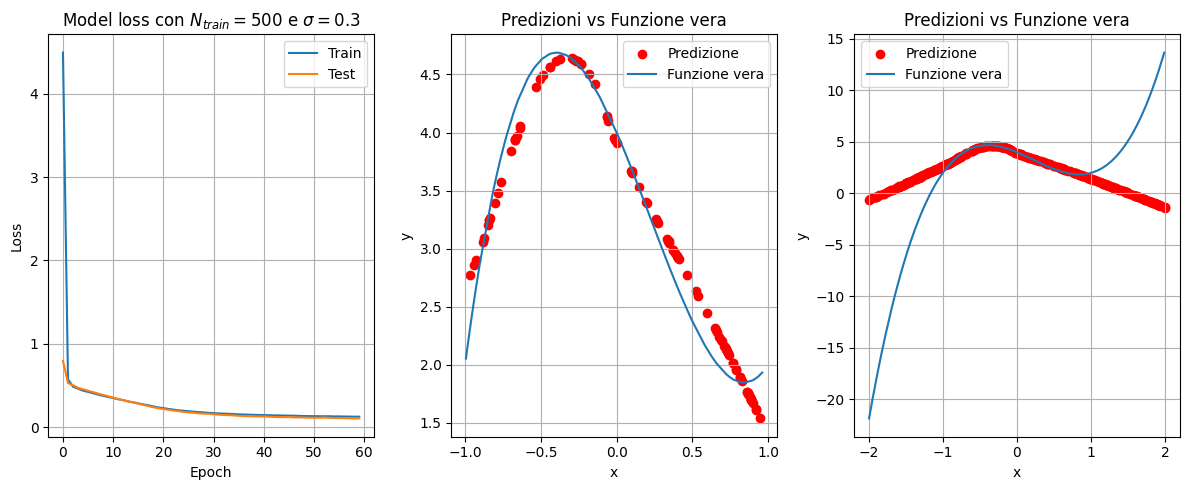


 
 Modello con  2  hidden layers con  15  neuroni ciascuno, activation function:  selu  , optimizer:  sgd 
 

Loss sulla funzione esatta:  0.024833541363477707 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

 Loss sulla funzione esatta, fuori intervallo di train:  39.69547653198242 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


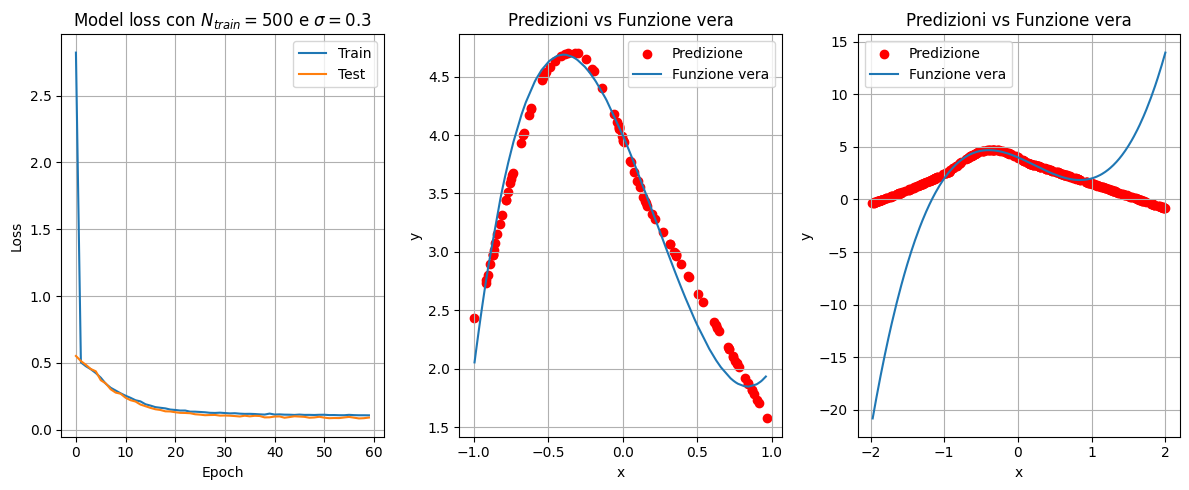


 
 Modello con  3  hidden layers con  20  neuroni ciascuno, activation function:  selu  , optimizer:  sgd 
 

Loss sulla funzione esatta:  0.020070288330316544 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

 Loss sulla funzione esatta, fuori intervallo di train:  36.363590240478516 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


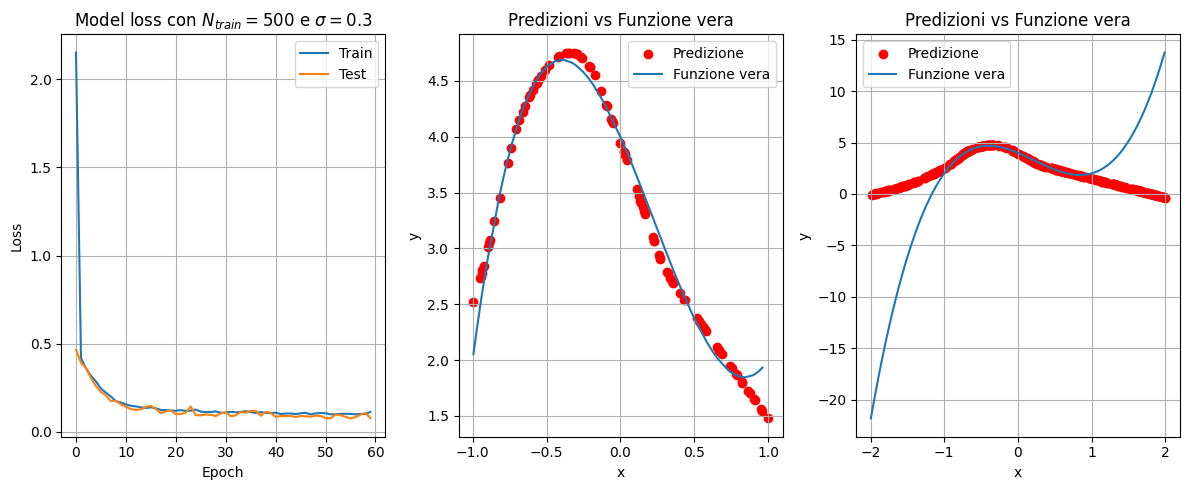


 
 Modello con  4  hidden layers con  25  neuroni ciascuno, activation function:  selu  , optimizer:  sgd 
 

Loss sulla funzione esatta:  0.05383332446217537 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

 Loss sulla funzione esatta, fuori intervallo di train:  38.74413299560547 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


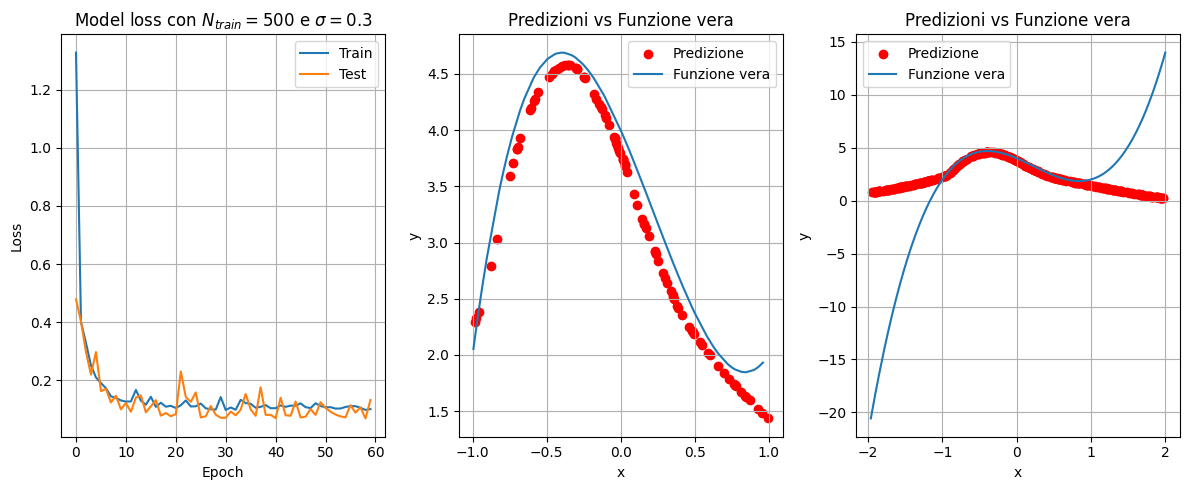


 
 Modello con  1  hidden layers con  10  neuroni ciascuno, activation function:  selu  , optimizer:  adam 
 

Loss sulla funzione esatta:  0.4561775326728821 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

 Loss sulla funzione esatta, fuori intervallo di train:  57.88414764404297 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


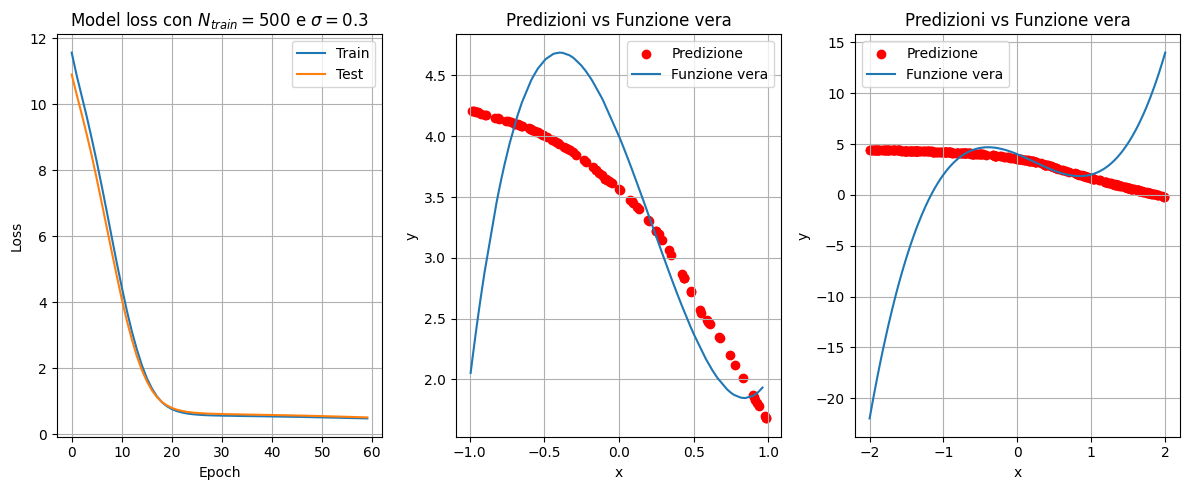


 
 Modello con  2  hidden layers con  15  neuroni ciascuno, activation function:  selu  , optimizer:  adam 
 

Loss sulla funzione esatta:  0.03924889117479324 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

 Loss sulla funzione esatta, fuori intervallo di train:  47.03355026245117 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


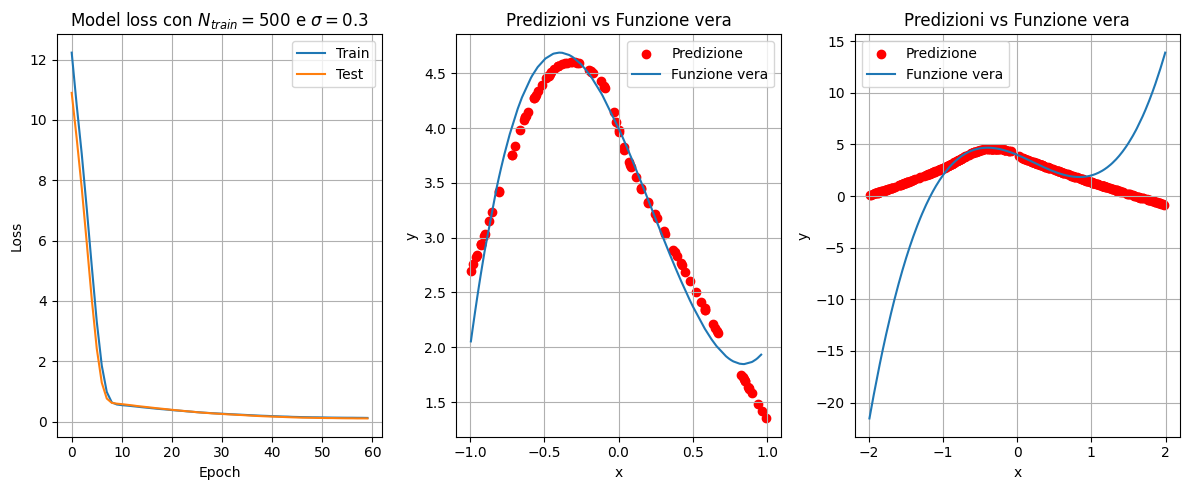


 
 Modello con  3  hidden layers con  20  neuroni ciascuno, activation function:  selu  , optimizer:  adam 
 

Loss sulla funzione esatta:  0.0268035139888525 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

 Loss sulla funzione esatta, fuori intervallo di train:  38.346614837646484 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


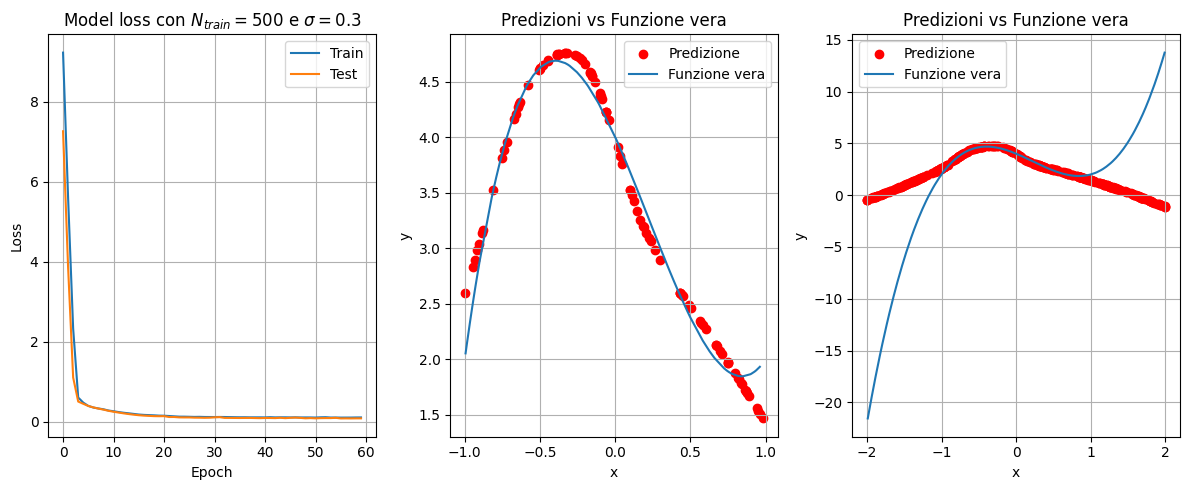


 
 Modello con  4  hidden layers con  25  neuroni ciascuno, activation function:  selu  , optimizer:  adam 
 

Loss sulla funzione esatta:  0.01152249239385128 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

 Loss sulla funzione esatta, fuori intervallo di train:  37.070125579833984 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


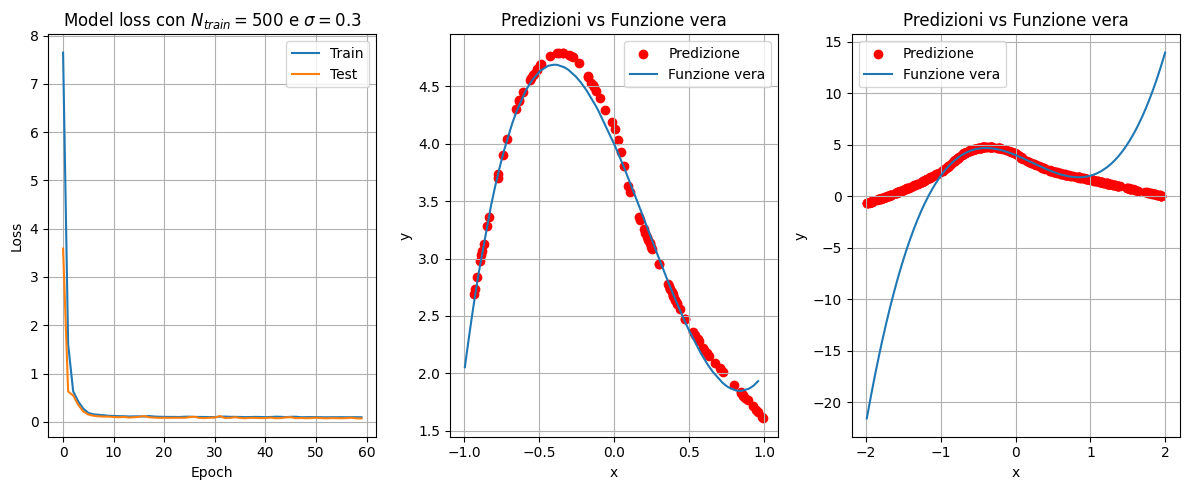

In [22]:
act_functions = ['relu', 'elu', 'selu']
optimizers = ['sgd', 'adam']

for act in act_functions:
    for opt in optimizers:
        model_creator(1, 10, act, opt, 60)
        model_creator(2, 15, act, opt, 60)
        model_creator(3, 20, act, opt, 60)
        model_creator(4, 25, act, opt, 60)

**Osservazioni:**
Dai vari test eseguiti si osserva che in generale una configurazione accettabile per la rete, indipendentemente dalla scelta delle funzioni di attivazione e dell'ottimizzatore, si ottiene con 3 hidden layers con 20 neuroni ciascuno. Superati questi valori la rete tende a generalizzare peggio, a riprova del fatto che aumentare la complessità di una rete non significa migliorarne le capacità predittive. Al contrario porta ad overfitting. 

Il modello migliore nell'estrapolare valori anche fuori dall'intervallo di train tra quelli testati è quello con 3  hidden layers con  20  neuroni ciascuno, activation function:  relu  , optimizer:  sgd.

Il modello migliore nel riprodurre valori entro l'intervallo di allenamento è quello con  3  hidden layers con  20  neuroni ciascuno, activation function:  relu  , optimizer:  adam. 

### Ex 11.3
  
Estendiamo ora l'esperimento a una funzione a due variabili:
$$
f(x,y) = \sin(x^2+y^2)
$$ 
con $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$. Allenando il modello su una distribuzione di punti estratti da questa funzione con un certo rumore quantificato da $\sigma = 0.2$.

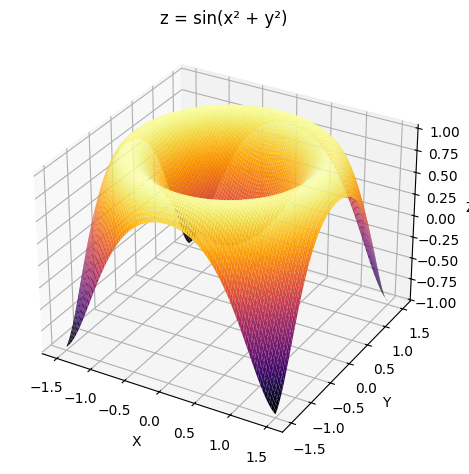

In [30]:
#Compilare la cella dove viene importato tensorflow 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


N_train = 500

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)
y_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, 80)
y_valid = np.random.uniform(-1, 1, 80)


sigma = 0.2 # noise standard deviation, for the moment it is absent

f_train = np.random.normal(np.sin(x_train**2 + y_train**2) , sigma) # actual measures from which we want to guess regression parameters
f_valid = np.random.normal(np.sin(x_valid**2 + y_valid**2), sigma) # ideal (target) non-linear function, sigma)
f_target = np.sin(x_valid**2 + y_valid**2)

# Definizione della funzione f(x, y)
def f(x, y):
    return np.sin(x**2 + y**2)

# Creazione della griglia di punti (X, Y)
x = np.linspace(-3/2, 3/2, 100)
y = np.linspace(-3/2, 3/2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Creazione del plot 3D della superficie (mesh)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap='inferno', rstride=1, cstride=1)

# Etichette e titolo
ax.set_title("z = sin(x² + y²)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.tight_layout()
plt.show()


In [38]:
def model_creator_3D(layers, n_per_layer, act_func, optim, N_epochs):

    model = tf.keras.Sequential()
    model.add(Dense(2, input_shape=(2,)))  
    for i in range(layers):
        model.add(Dense(n_per_layer, activation=act_func))
    model.add(Dense(1))

    model.compile(optimizer=optim, loss='mse', metrics=['mse'])
    #model.summary()

    X_train = np.column_stack((x_train, y_train))  #le funzioni di tf vogliono gli input in una sola matrice
    X_valid = np.column_stack((x_valid, y_valid))
    
    history = model.fit(x=X_train, y=f_train,
                        batch_size=32, epochs=N_epochs,
                        shuffle=True,
                        validation_data=(X_valid, f_valid),
                       verbose=0)


    #valuto la performance sulla funzione reale (senza noise!)
    score = model.evaluate(X_valid, f_target, batch_size=32, verbose=0)

    print('\n', '\n', "Modello con ", layers, " hidden layers con ", n_per_layer, " neuroni ciascuno, activation function: ",
          act_func," , optimizer: ", optim, '\n', '\n')
    print("Loss su funzione target: ", score[0], '\n')
    

    #Plots
    fig = plt.figure(figsize=(12, 5))  # 1 riga, 2 colonne

    # Plotto predizioni VS curva vera
    f_predicted = model.predict(X_valid)

    
    ax2 = fig.add_subplot(1,2, 2, projection='3d')

    # Superficie vera
    ax2.plot_surface(X, Y, Z, cmap='inferno', rstride=1, cstride=1, alpha=0.6)
    
    # Scatter dei punti predetti o reali
    ax2.scatter(X_valid[:, 0], X_valid[:, 1], f_target, color='red', label='Previsione f(x,y)',
               edgecolors='k', s=40, zorder=10)
    
    # Etichette e titolo
    ax2.set_title("z = sin(x² + y²) con punti validazione")
    ax2.set_xlabel("X")
    ax2.set_ylabel("Y")
    ax2.set_zlabel("Z")

    ax2.legend()

    # Plotto la curva vera
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title(rf'Model loss con $N_{{train}} = {N_train}$ e $\sigma = {sigma}$')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend(['Train', 'Test'], loc='best')
    ax1.grid(True)

    
    plt.tight_layout()
    plt.show()

   


 
 Modello con  1  hidden layers con  15  neuroni ciascuno, activation function:  relu  , optimizer:  sgd 
 

Loss su funzione target:  0.047331083565950394 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


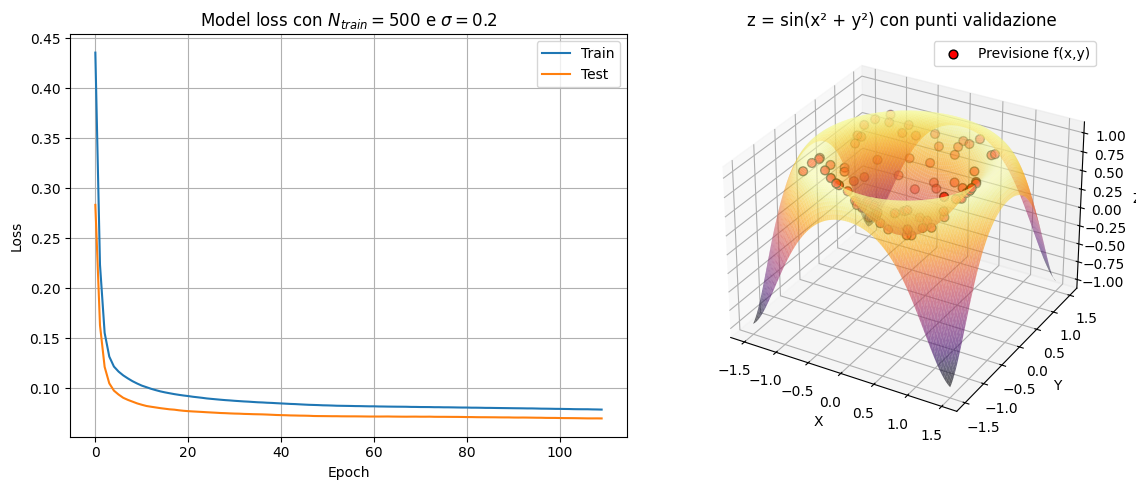


 
 Modello con  2  hidden layers con  20  neuroni ciascuno, activation function:  relu  , optimizer:  sgd 
 

Loss su funzione target:  0.02511662244796753 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


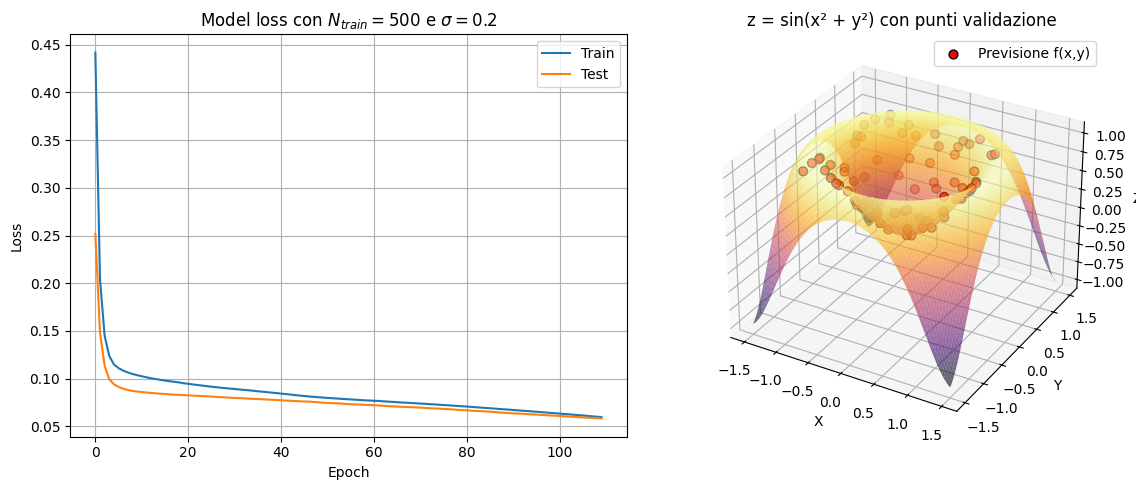


 
 Modello con  3  hidden layers con  25  neuroni ciascuno, activation function:  relu  , optimizer:  sgd 
 

Loss su funzione target:  0.0027746353298425674 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


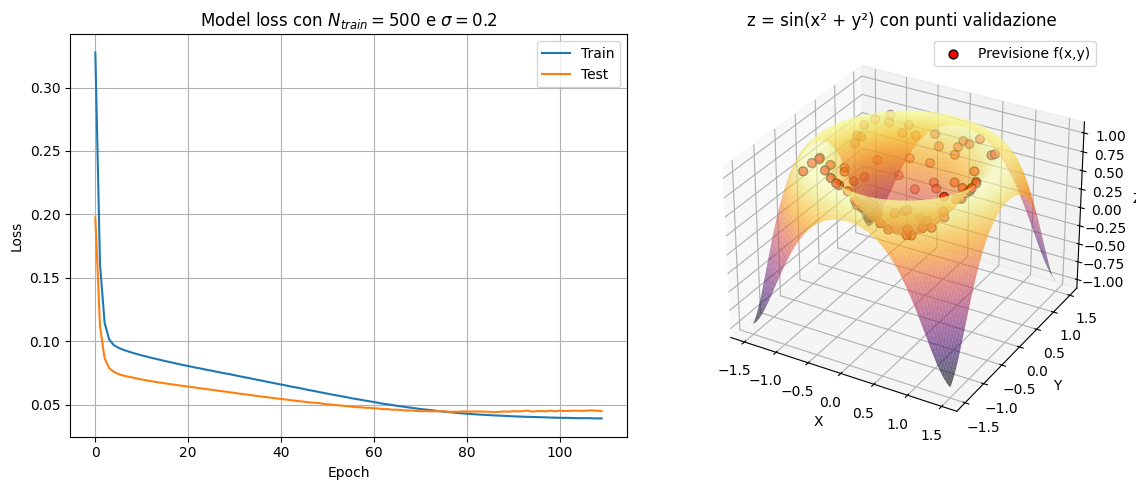


 
 Modello con  4  hidden layers con  30  neuroni ciascuno, activation function:  relu  , optimizer:  sgd 
 

Loss su funzione target:  0.002147486200556159 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


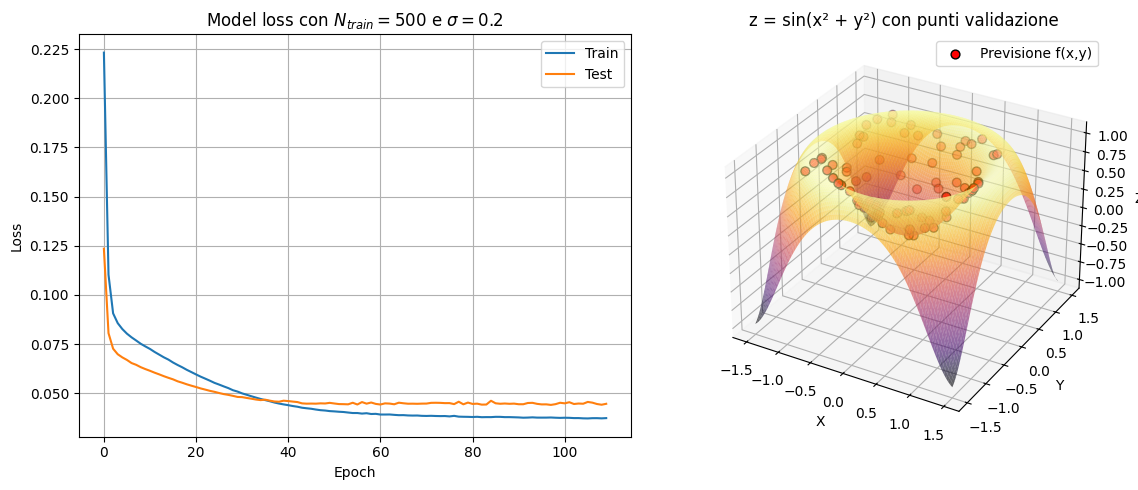


 
 Modello con  1  hidden layers con  15  neuroni ciascuno, activation function:  relu  , optimizer:  adam 
 

Loss su funzione target:  0.003479334060102701 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


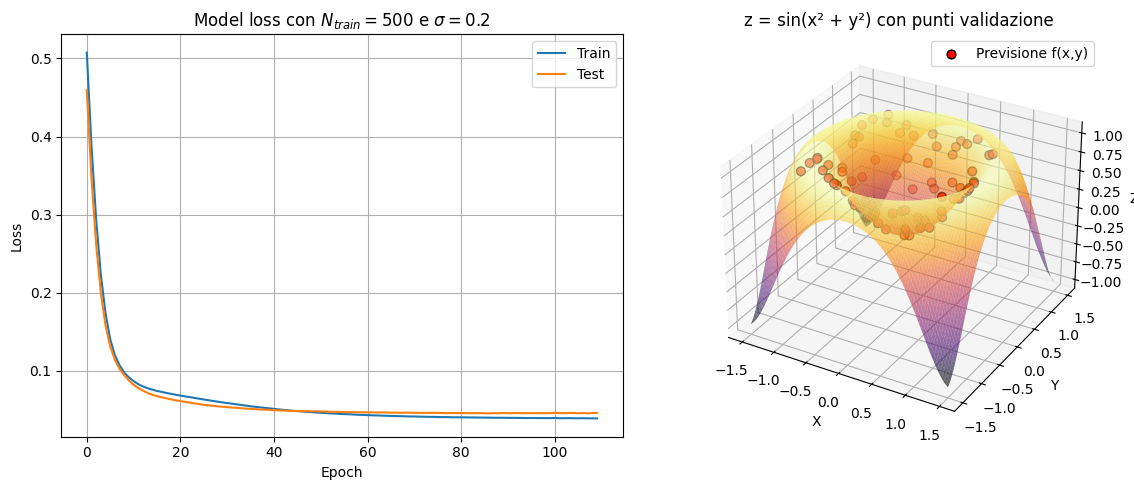


 
 Modello con  2  hidden layers con  20  neuroni ciascuno, activation function:  relu  , optimizer:  adam 
 

Loss su funzione target:  0.002554551465436816 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


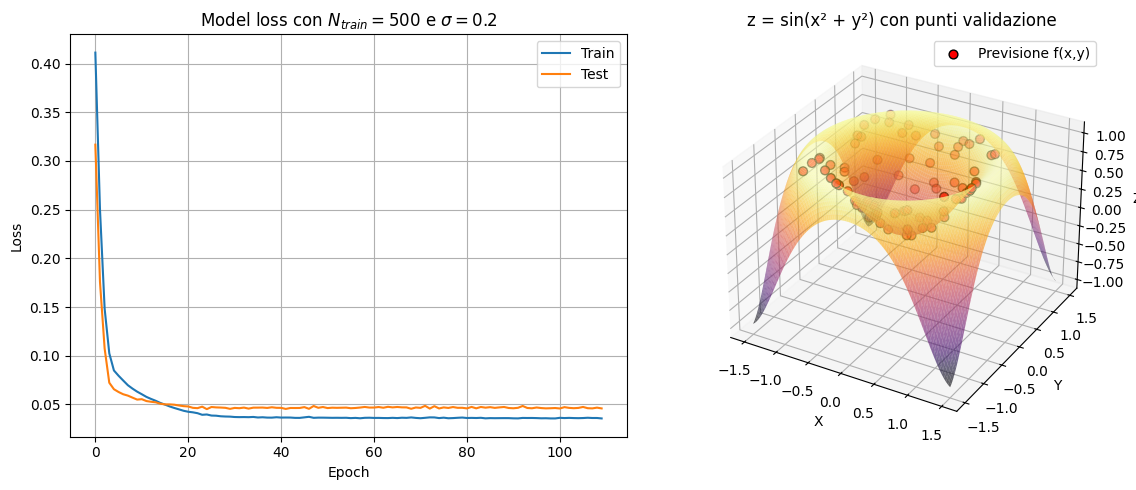


 
 Modello con  3  hidden layers con  25  neuroni ciascuno, activation function:  relu  , optimizer:  adam 
 

Loss su funzione target:  0.0037381486035883427 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


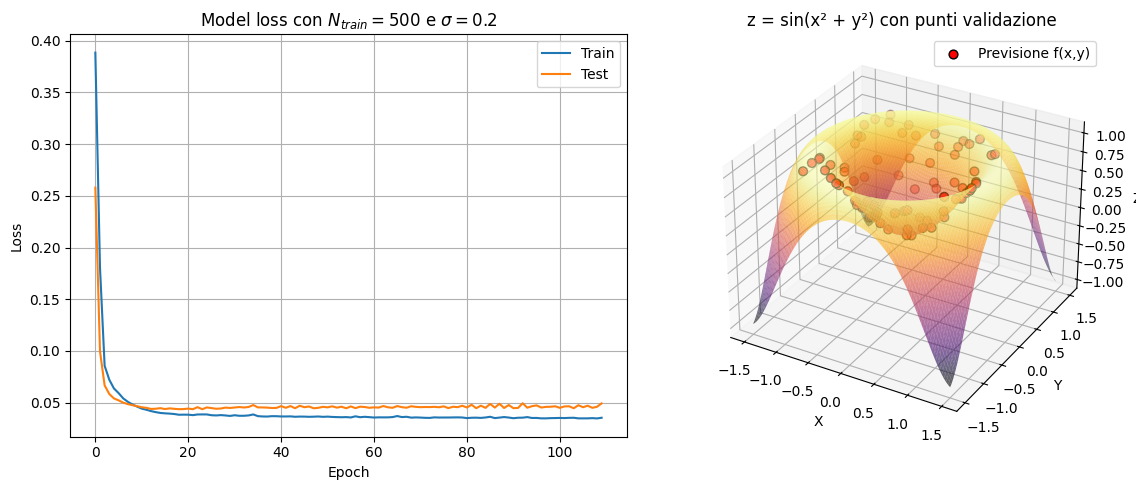


 
 Modello con  4  hidden layers con  30  neuroni ciascuno, activation function:  relu  , optimizer:  adam 
 

Loss su funzione target:  0.0026729025412350893 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


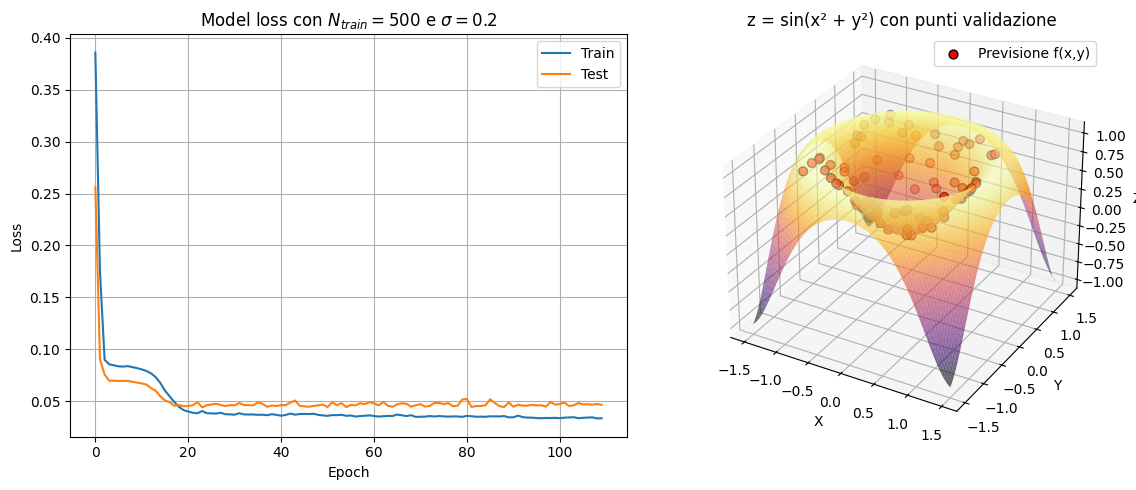


 
 Modello con  1  hidden layers con  15  neuroni ciascuno, activation function:  elu  , optimizer:  sgd 
 

Loss su funzione target:  0.059669822454452515 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


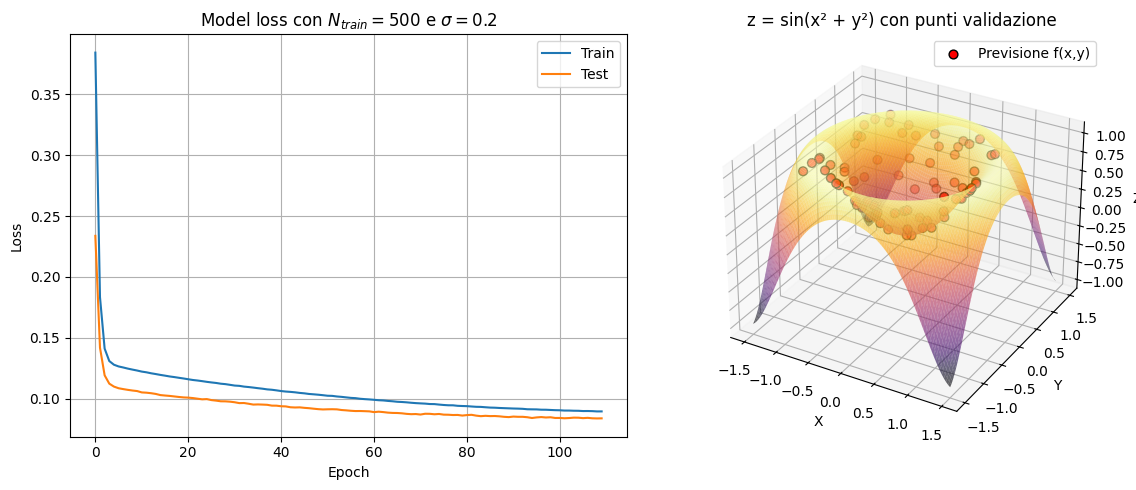


 
 Modello con  2  hidden layers con  20  neuroni ciascuno, activation function:  elu  , optimizer:  sgd 
 

Loss su funzione target:  0.03780179098248482 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


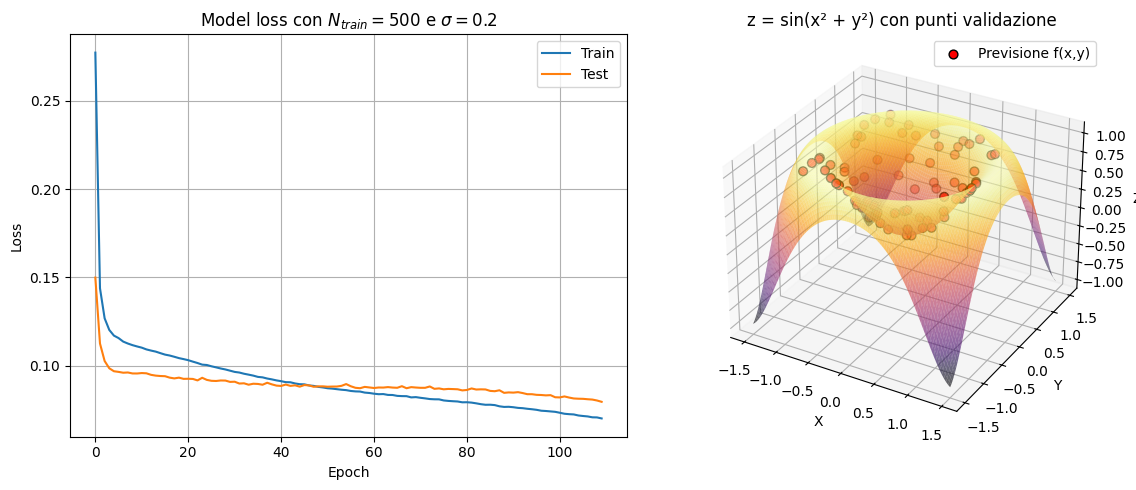


 
 Modello con  3  hidden layers con  25  neuroni ciascuno, activation function:  elu  , optimizer:  sgd 
 

Loss su funzione target:  0.051490865647792816 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


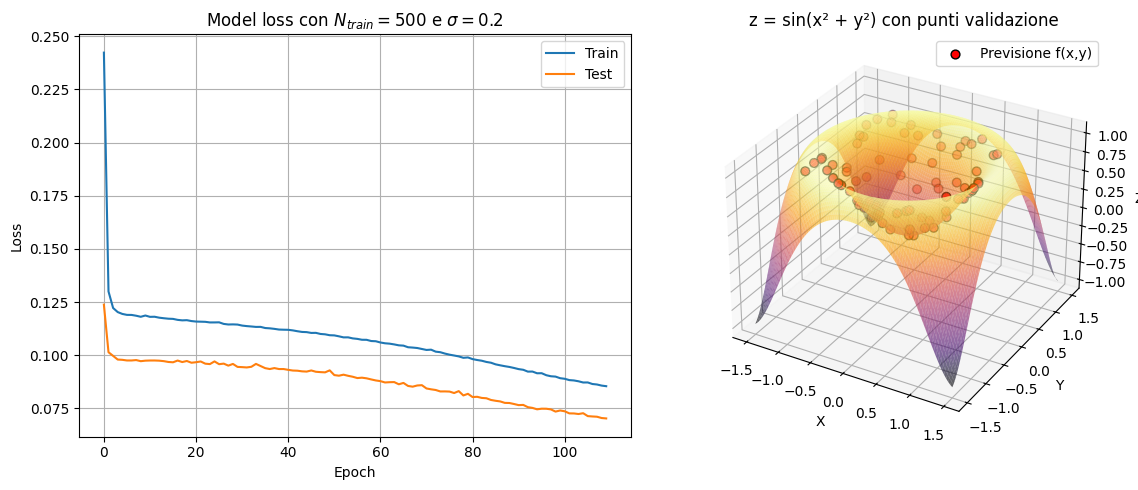


 
 Modello con  4  hidden layers con  30  neuroni ciascuno, activation function:  elu  , optimizer:  sgd 
 

Loss su funzione target:  0.0628131851553917 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


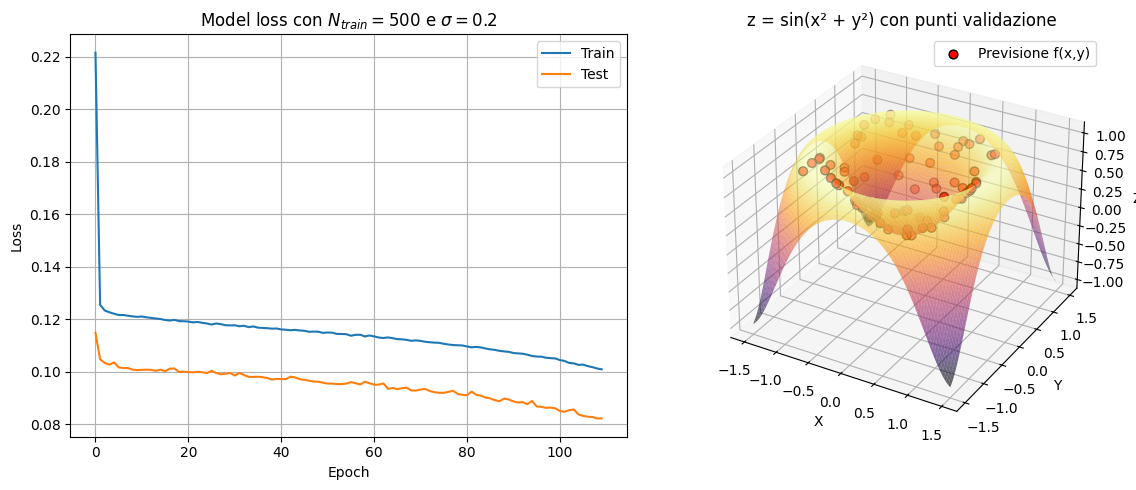


 
 Modello con  1  hidden layers con  15  neuroni ciascuno, activation function:  elu  , optimizer:  adam 
 

Loss su funzione target:  0.0036958344280719757 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


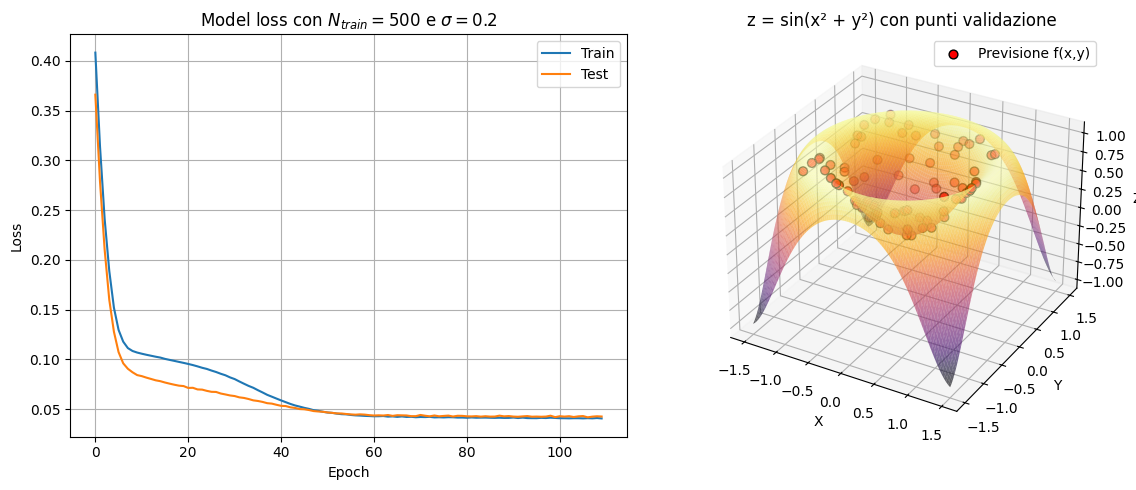


 
 Modello con  2  hidden layers con  20  neuroni ciascuno, activation function:  elu  , optimizer:  adam 
 

Loss su funzione target:  0.006208853330463171 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


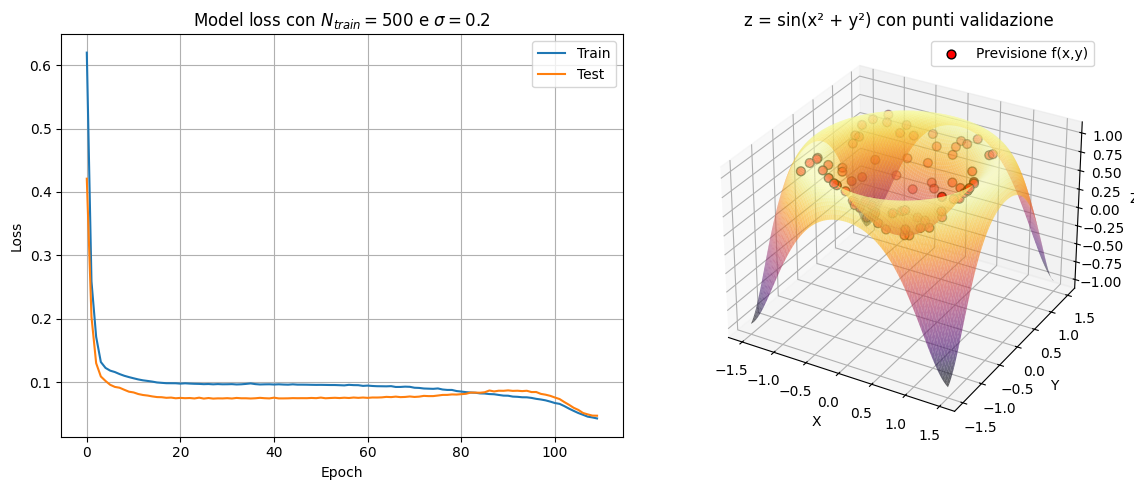


 
 Modello con  3  hidden layers con  25  neuroni ciascuno, activation function:  elu  , optimizer:  adam 
 

Loss su funzione target:  0.0031107680406421423 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


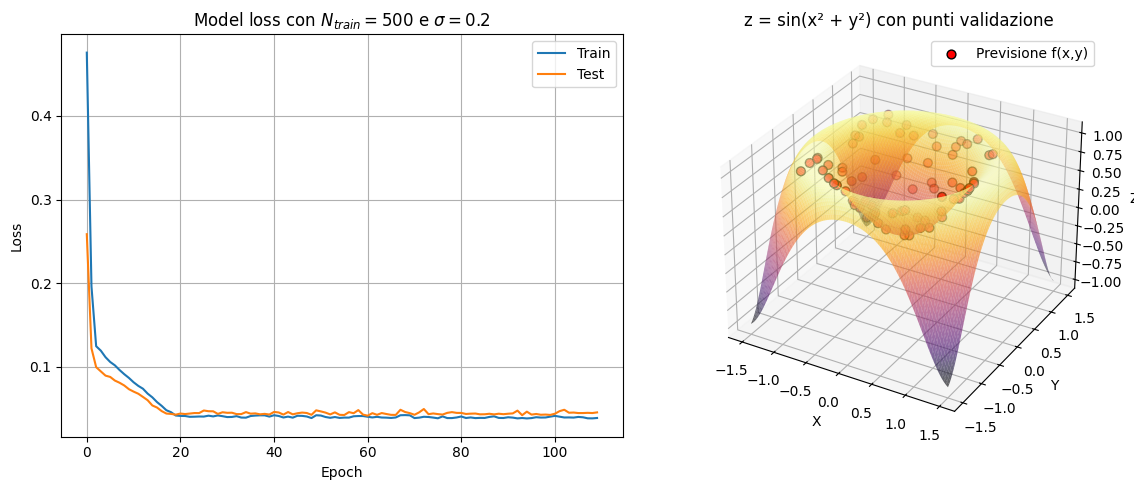


 
 Modello con  4  hidden layers con  30  neuroni ciascuno, activation function:  elu  , optimizer:  adam 
 

Loss su funzione target:  0.0037707469891756773 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


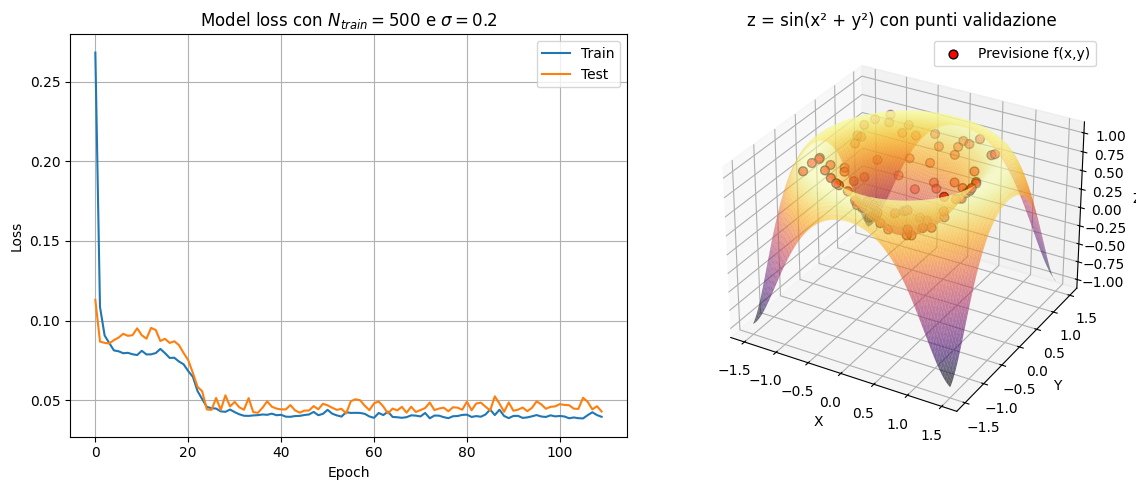


 
 Modello con  1  hidden layers con  15  neuroni ciascuno, activation function:  selu  , optimizer:  sgd 
 

Loss su funzione target:  0.06985540688037872 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


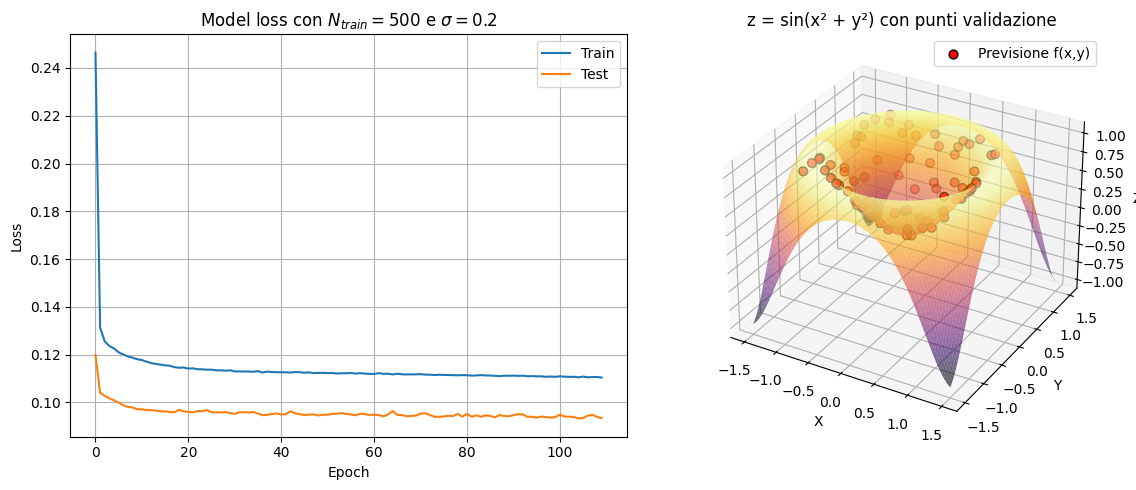


 
 Modello con  2  hidden layers con  20  neuroni ciascuno, activation function:  selu  , optimizer:  sgd 
 

Loss su funzione target:  0.010353341698646545 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


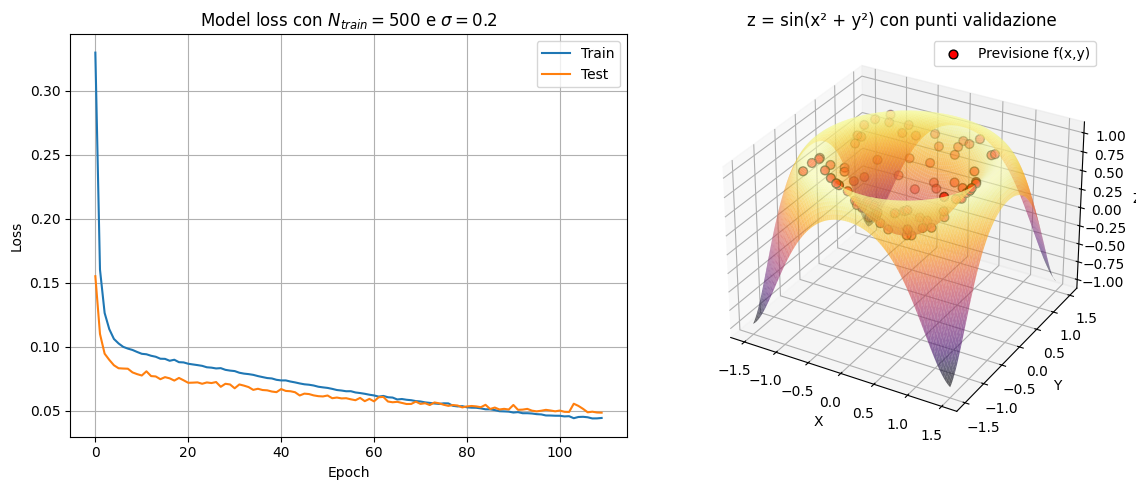


 
 Modello con  3  hidden layers con  25  neuroni ciascuno, activation function:  selu  , optimizer:  sgd 
 

Loss su funzione target:  0.00987886544317007 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


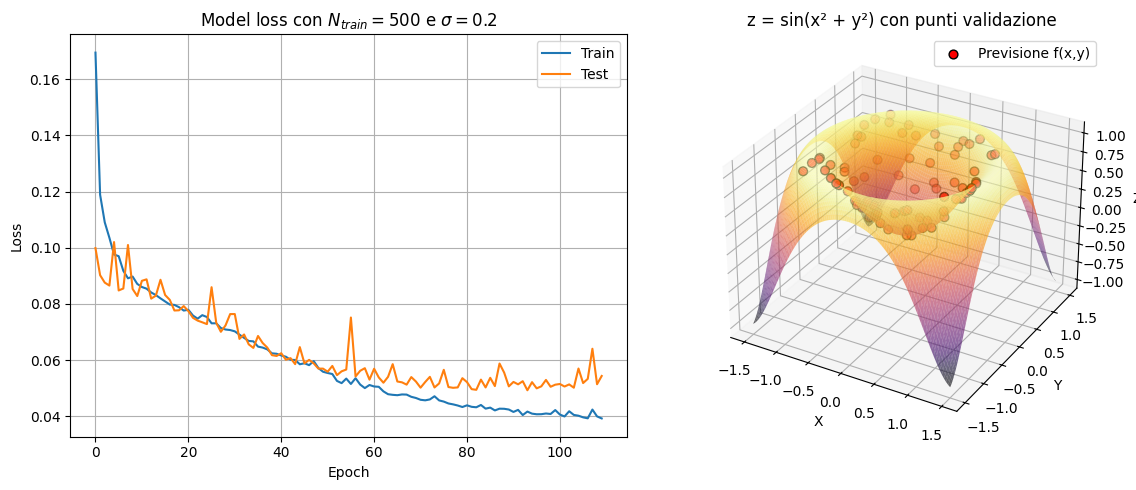


 
 Modello con  4  hidden layers con  30  neuroni ciascuno, activation function:  selu  , optimizer:  sgd 
 

Loss su funzione target:  0.0031338040716946125 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


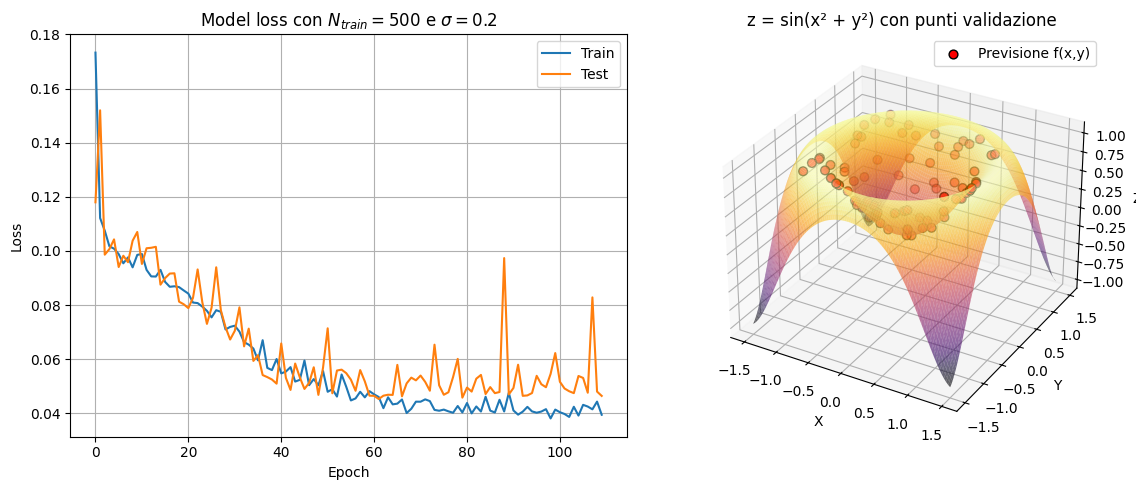


 
 Modello con  1  hidden layers con  15  neuroni ciascuno, activation function:  selu  , optimizer:  adam 
 

Loss su funzione target:  0.051273517310619354 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


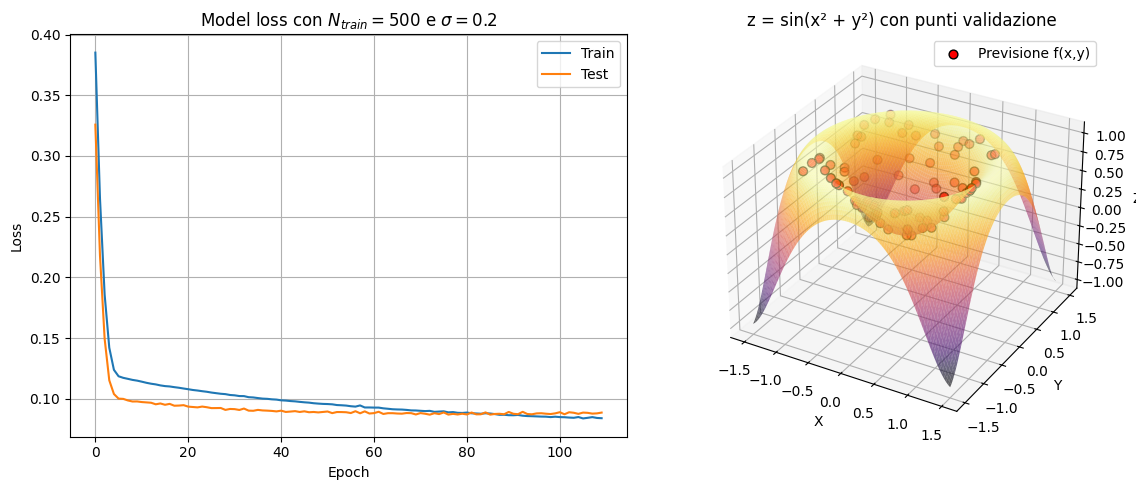


 
 Modello con  2  hidden layers con  20  neuroni ciascuno, activation function:  selu  , optimizer:  adam 
 

Loss su funzione target:  0.004650832619518042 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


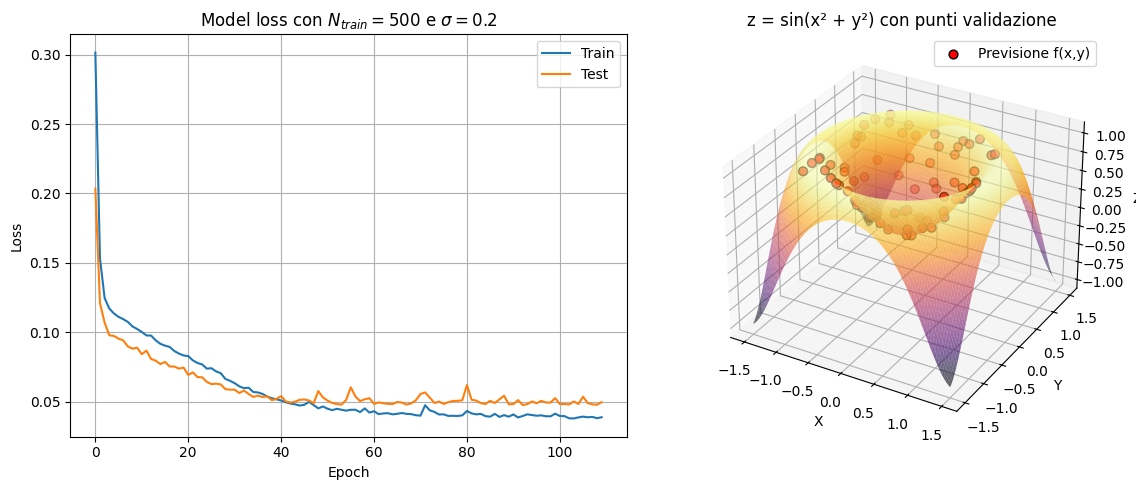


 
 Modello con  3  hidden layers con  25  neuroni ciascuno, activation function:  selu  , optimizer:  adam 
 

Loss su funzione target:  0.0029263379983603954 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


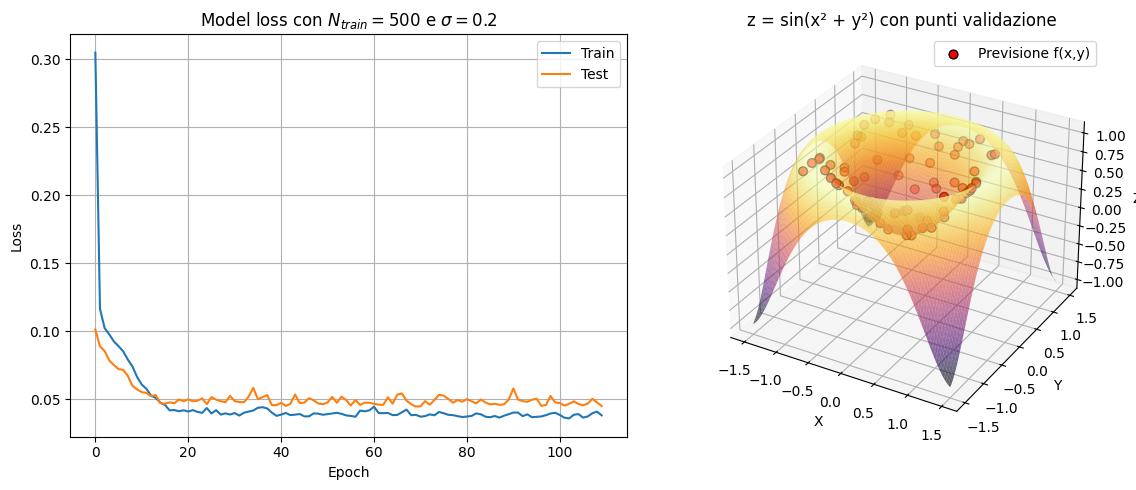


 
 Modello con  4  hidden layers con  30  neuroni ciascuno, activation function:  selu  , optimizer:  adam 
 

Loss su funzione target:  0.0032653226517140865 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


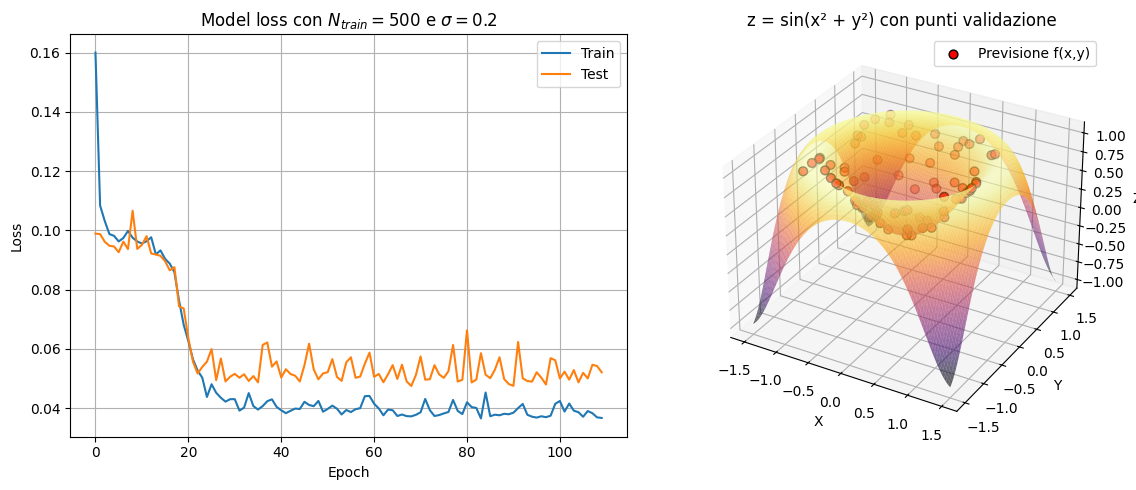

In [39]:
act_functions = ['relu', 'elu', 'selu']
optimizers = ['sgd', 'adam']

for act in act_functions:
    for opt in optimizers:
        model_creator_3D(1, 15, act, opt, 110)
        model_creator_3D(2, 20, act, opt, 110)
        model_creator_3D(3, 25, act, opt, 110)
        model_creator_3D(4, 30, act, opt, 110)

Tra quelli testati per questa task, il modello che ha fornito il risultato migliore (loss function minore sul validation set) è quello con 4  hidden layers con  30  neuroni ciascuno, activation function:  relu  , optimizer:  sgd.

Anche in questo caso, in genere i modelli con 3 layer sono sufficienti e non generano overfitting.

Si noti inoltre la maggior velocità di convergenza verso il minimo data dall'ottimizzatore 'Adam'. Esso migliora la performance rispetto ad un sgd in quanto tiene memoria dei valori del gradiente (dunque è momentum driven) e ciò stabilizza la traiettoria di discesa. Inoltre adatta il learning rate in base al modulo del gradiente, anche questo stabilizza la discesa.